# <font color="darkblue">*Student:* `Sanad Abdelrahman Alawi`</font>


### *<u>Project Documentation</u>*

- **Instructor**           : `Engineer Motasem Samara`
- **Dataset Source**       : [Loan Approval Prediction](https://www.kaggle.com/competitions/playground-series-s4e10/discussion/536984)
- **Code Last Modify Date**: 10/14/2024 - Monday

### *<u>Project Sections</u>*

- **Section 1**: Loading the Data and Analyzing It...
- **Section 2**: Removing Irrelevant Columns
- **Section 3**: Providing the Necessary Plots and EDA (for each Feature)
- **Section 4**: Splitting the Data into Training and Testing Sets
- **Section 5**: Encoding Categorical Features
- **Section 6**: Oversampling and Undersampling
- **Section 7**: Feature Scaling
- **Section 8**: Selecting the Best Encoding, Sampling, and Scaling Combination
- **Section 9**: Model Selection
- **Section 10**: Hyperparameter Tuning
- **Section 11**: Model Evaluation
- **Section 12**: PCA
- **Section 13**: Dendogram and Agglomerative Clustering
- **Section 14**: KMeans Clustering
- **Section 15**: DBSCAN Clustering
- **Section 16**: Feature Engineering and EDA
- **Section 17**: Rebuilding the Model After Feature Engineering
- **Section 18**: Deep Learning
- **Section 19**: Deep Learning - Hyperparameter Tuning
- **Section 20**: Submitting Results to Kaggle Competition
- **Section 21**: Saving Our Model

---


### `Section 1` - Loading the Data and Analyzing It...

- 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- 2

In [3]:
train             = pd.read_csv('./resources/train.csv')
test              = pd.read_csv('./resources/test.csv')
sample_submission = pd.read_csv('./resources/sample_submission.csv')

- 3

In [79]:
print(f"Train  dataset    shape: {train.shape}            ")
print(f"Test   dataset    shape: {test.shape}             ")
print(f"Sample submission shape: {sample_submission.shape}")

Train  dataset    shape: (58645, 13)            
Test   dataset    shape: (39098, 12)             
Sample submission shape: (39098, 2)


- 4

In [80]:
train.head(1)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0


In [81]:
test.head(1)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2


In [82]:
sample_submission.head(1)

,id,loan_status
0,58645,0.5


- 5

In [83]:
train.tail(3)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


- 6

In [84]:
train.sample(3)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
50177,50177,27,65000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,7000,10.99,0.11,N,5,0
7705,7705,28,52000,RENT,3.0,PERSONAL,C,11000,12.61,0.22,N,10,0
49715,49715,25,60000,RENT,5.0,MEDICAL,B,8000,10.99,0.13,N,4,0


- 7

In [85]:
features = list(train.columns)

for index, feature in enumerate(features):
    print(index, feature)

0 id
1 person_age
2 person_income
3 person_home_ownership
4 person_emp_length
5 loan_intent
6 loan_grade
7 loan_amnt
8 loan_int_rate
9 loan_percent_income
10 cb_person_default_on_file
11 cb_person_cred_hist_length
12 loan_status


- 8

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

- 9

In [87]:
train.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

- 10

In [88]:
train.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


- 11

In [89]:
import warnings
warnings.filterwarnings("ignore", message="Styler.applymap has been deprecated")

max_emp_length = train['person_emp_length'].max()

styled_df = train.describe(exclude='object').T.style.format({
    'count': "{:.1f}",
    'mean' : "{:.6f}",
    'std'  : "{:.6f}",
    'min'  : "{:.2f}",
    '25%'  : "{:.2f}",
    '50%'  : "{:.2f}",
    '75%'  : "{:.2f}",
    'max'  : "{:.2f}"
}).applymap(
    lambda x: 'background-color: coral' if x == max_emp_length else ''
)

styled_df

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


- 12

In [90]:
train.describe(include='object').T

,count,unique,top,freq
person_home_ownership,58645,4,RENT,30594
loan_intent,58645,6,EDUCATION,12271
loan_grade,58645,7,A,20984
cb_person_default_on_file,58645,2,N,49943


- 13

In [91]:
missing_values_count = train.isnull().sum()
missing_values_count

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

- 14

In [92]:
duplicated_rows = train.duplicated()
train[duplicated_rows].head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


- 15

In [93]:
len(train[duplicated_rows])

0

- 16

In [94]:
train.corr(numeric_only=True)

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
id,1.000000,0.008608,-0.001896,0.005376,-0.000403,-0.003454,-0.002677,0.008139,-0.008138
person_age,0.008608,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,-0.001896,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.005376,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,-0.000403,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,-0.003454,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.002677,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.008139,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.008138,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


- 17

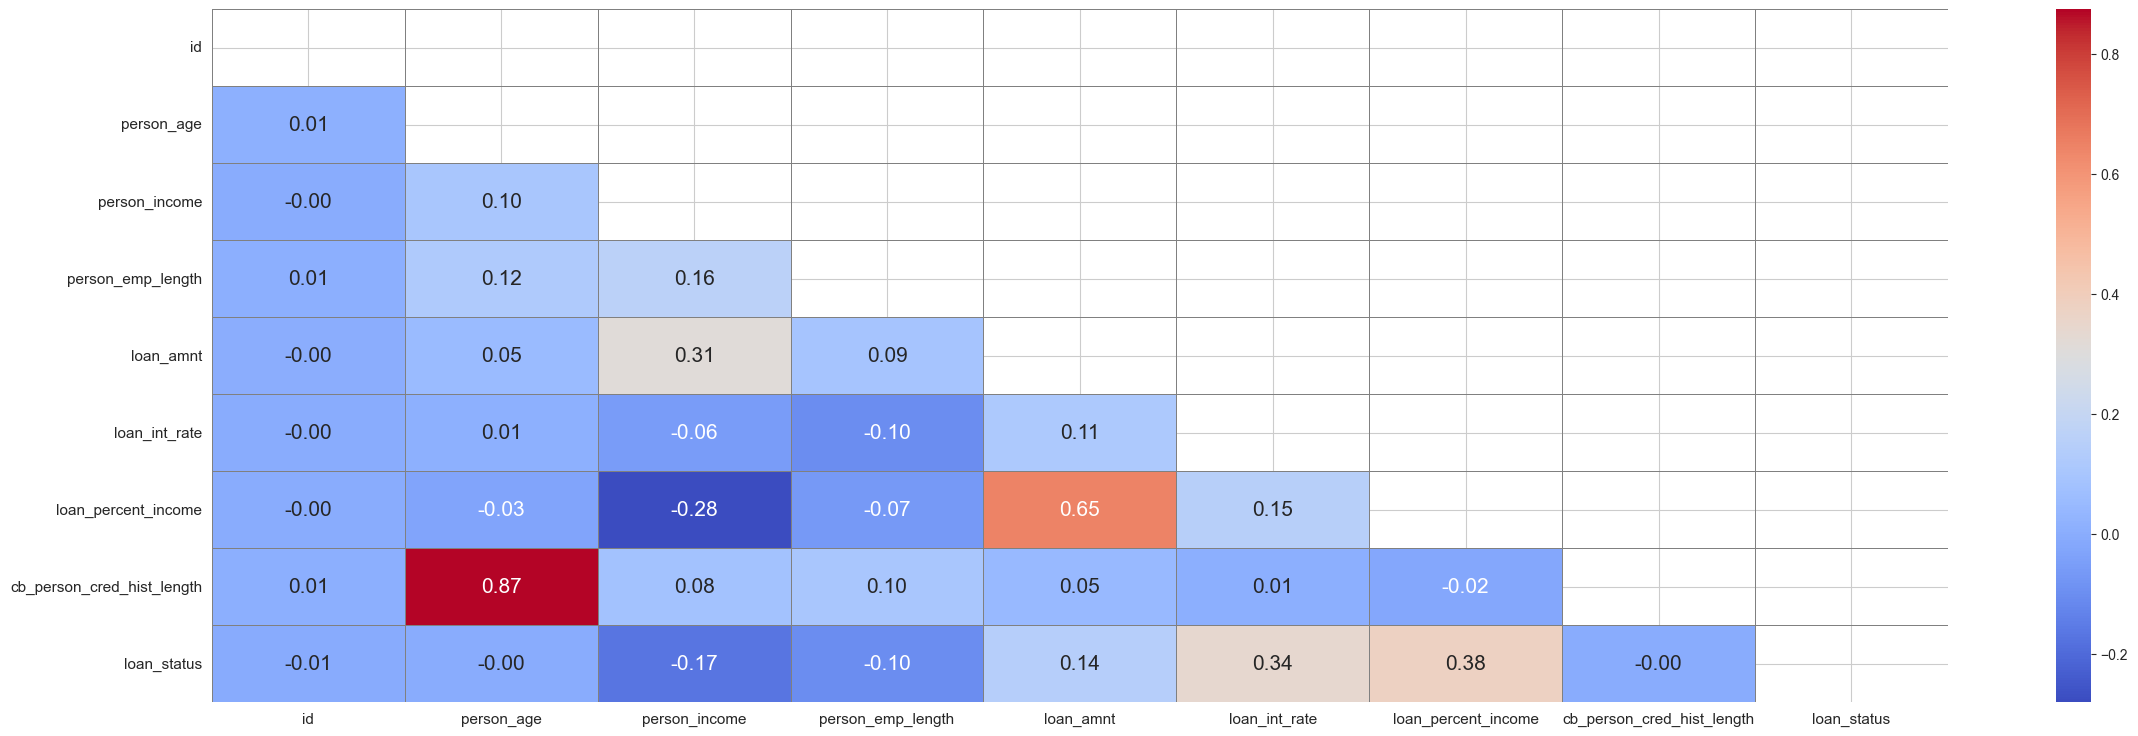

In [95]:
plt.figure(figsize=(28, 9))
sns.heatmap(train.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f', linecolor='gray', linewidths=0.6, annot_kws={'size': 15}, 
            mask=np.triu(np.ones_like(train.corr(numeric_only=True), dtype=bool)));
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

- 18

In [96]:
correlation = train.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)
correlation

loan_status                   1.000000
loan_percent_income           0.378280
loan_int_rate                 0.338948
loan_amnt                     0.144982
person_age                   -0.001130
cb_person_cred_hist_length   -0.003030
id                           -0.008138
person_emp_length            -0.100428
person_income                -0.169956
Name: loan_status, dtype: float64

- 19

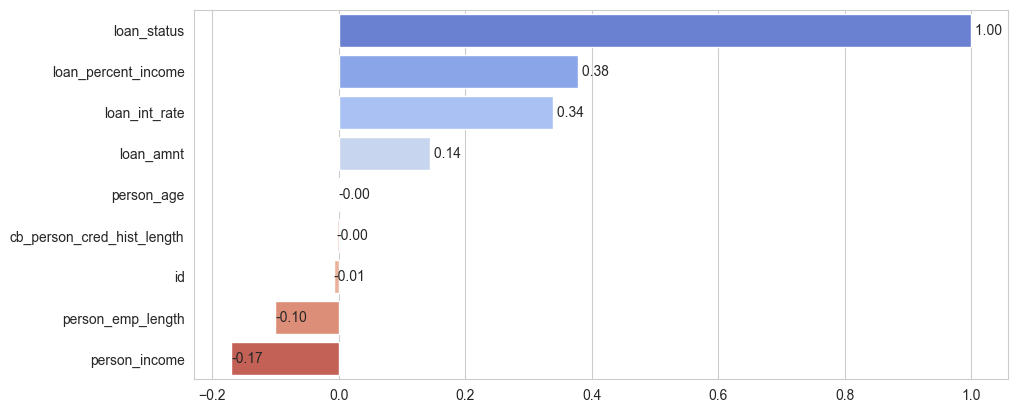

In [97]:
plt.figure(figsize=(10.5, 4.8))
sns.barplot(x=correlation.values, y=correlation.index, hue=correlation.index, palette='coolwarm')

for index, value in enumerate(correlation.values):
    if np.isfinite(value):
        plt.text(value, index, f'{value: .2f}', va='center')
plt.ylabel('');

- 20

In [98]:
for col in train.select_dtypes(include='object').columns:
    print(f'\t\t{col} value counts: ')
    print(train[col].value_counts())
    print('-' * 150)

		person_home_ownership value counts: 
person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
		loan_intent value counts: 
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
		loan_grade value counts: 
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
		cb_person_defau

- 21

		Boxplot of id


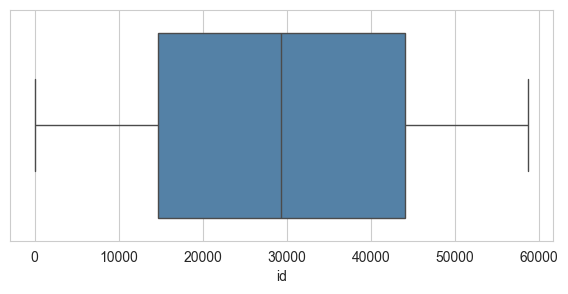

******************************************************************************************************************************************************
		Boxplot of person_age


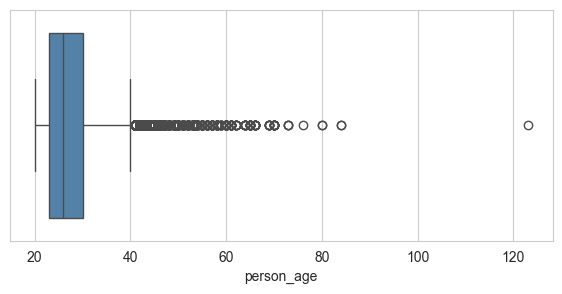

******************************************************************************************************************************************************
		Boxplot of person_income


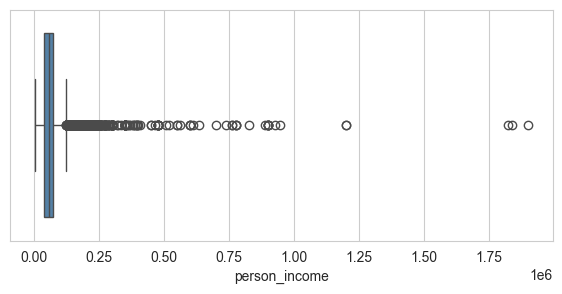

******************************************************************************************************************************************************
		Boxplot of person_emp_length


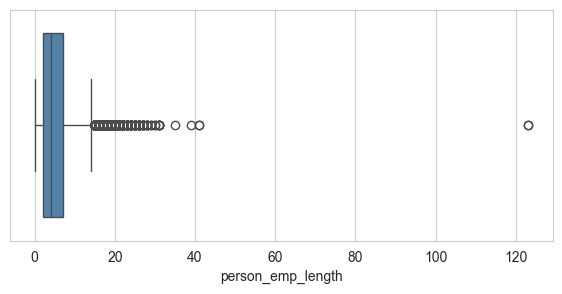

******************************************************************************************************************************************************
		Boxplot of loan_amnt


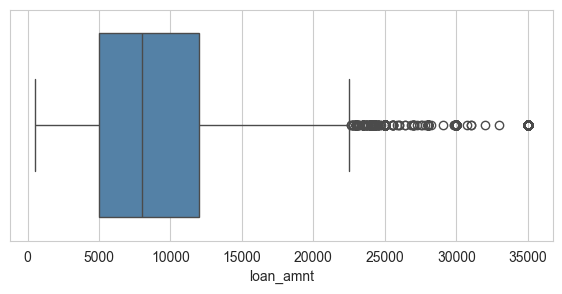

******************************************************************************************************************************************************
		Boxplot of loan_int_rate


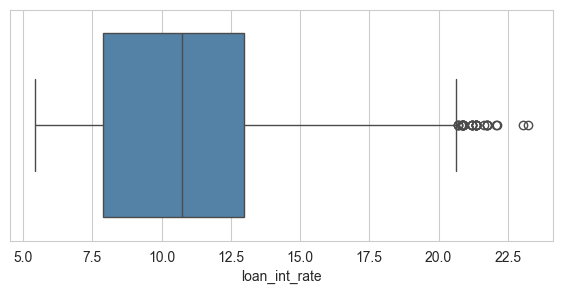

******************************************************************************************************************************************************
		Boxplot of loan_percent_income


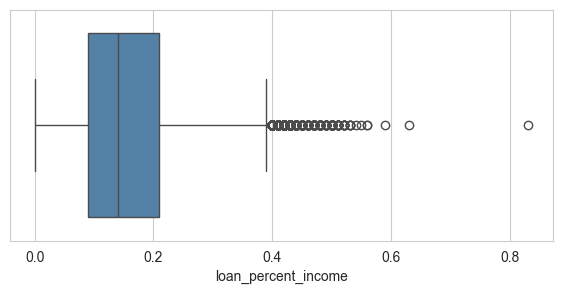

******************************************************************************************************************************************************
		Boxplot of cb_person_cred_hist_length


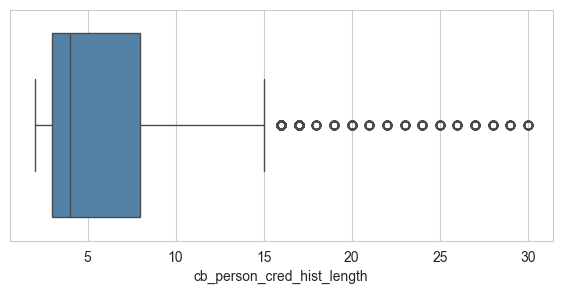

******************************************************************************************************************************************************
		Boxplot of loan_status


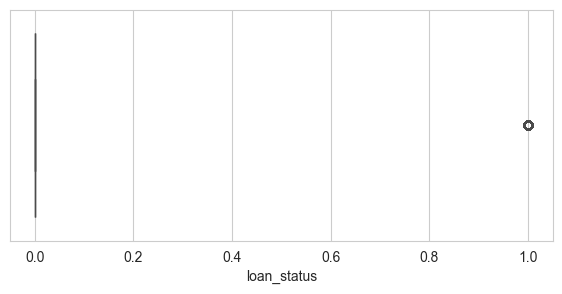

******************************************************************************************************************************************************


In [99]:
sns.set_style('whitegrid')
for col in train.select_dtypes(include='number').columns:
    plt.figure(figsize=(7, 3))
    print(f'\t\tBoxplot of {col}')
    sns.boxplot(x=train[col], color='steelblue')
    plt.show()
    print('*' * 150)

- 22

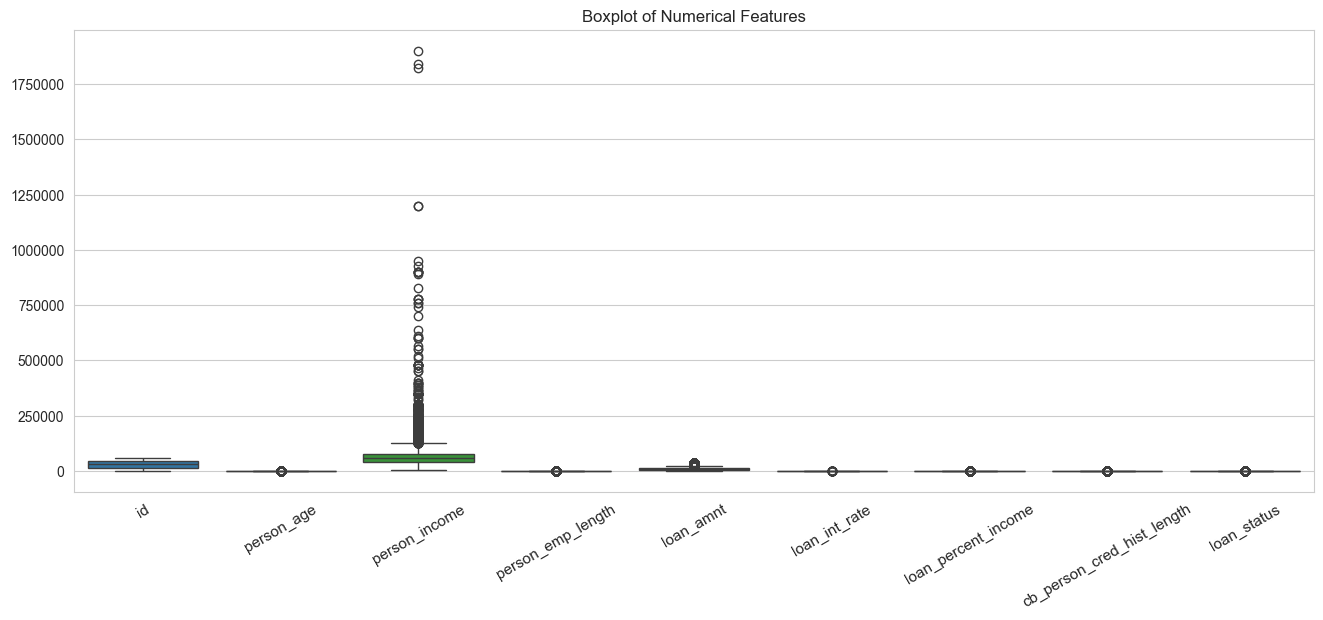

In [100]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=train.select_dtypes(include=np.number))
plt.title('Boxplot of Numerical Features')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=30, fontsize=11);

- 23

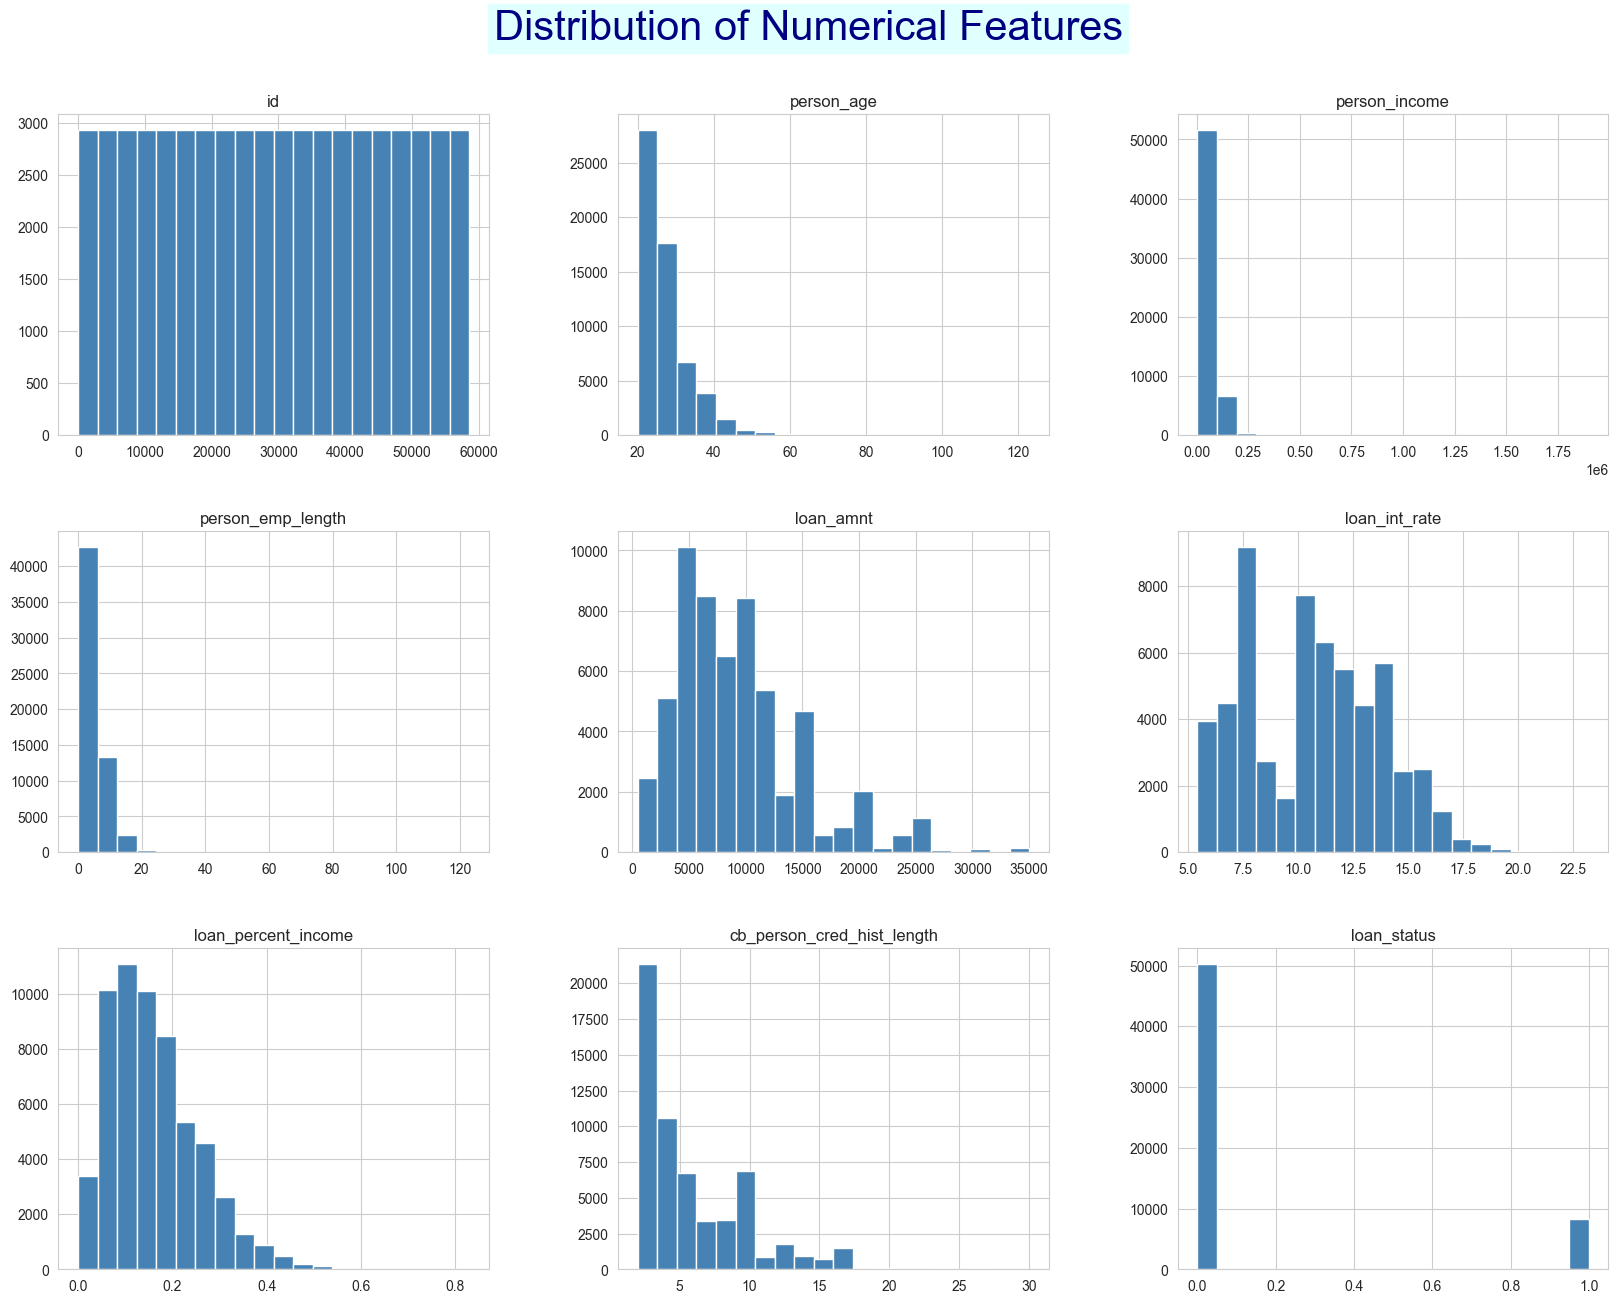

In [101]:
train.hist(bins=20, figsize=(20, 15), color='steelblue')
plt.suptitle('Distribution of Numerical Features', fontsize=30, color='navy', backgroundcolor='lightcyan', y=0.95);

- 24

In [102]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.tight_layout(pad=4)

plt.suptitle('Distribution of Numerical Features by Loan Status', fontsize=30, color='navy', backgroundcolor='lightcyan', y=1.03)
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(train, x=column, hue='loan_status', ax=ax, bins=20, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

for j in range(i + 1, 9):
    axes[j // 3, j % 3].set_visible(False)

Error in callback <function flush_figures at 0x0000028648F336A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

- 25

In [ ]:
plt.figure(figsize=(11, 6))
sns.set_style('darkgrid')

sns.scatterplot(train, x='person_age', y='cb_person_cred_hist_length');
sns.regplot(train, x='person_age', y='cb_person_cred_hist_length', scatter=False,
            color='red', line_kws={'linestyle': '--', 'linewidth': 1}, label='Regression Line')

plt.title('Relationship between Person Age and Credit History Length', color='Chocolate', fontsize=15,
          backgroundcolor='wheat', pad=12)
plt.xlabel('Person Age', color='Chocolate', fontsize=13)
plt.ylabel('Credit History Length', color='Chocolate', fontsize=13)
plt.legend();

- 26

In [ ]:
calculation = (train['loan_amnt'] / train['person_income']).round(2)

pd.DataFrame({
    'person_income'      : train['person_income'],
    'loan_amnt'          : train['loan_amnt'],
    'loan_percent_income': train['loan_percent_income'],
    'calculation'        : calculation
}).head(4)

### `Section 2` - Removing Irrelevant Columns

- 1

In [ ]:
train.head(1)

- 2

In [ ]:
train = train.drop(columns=['id'])

### `Section 3` - Providing the Necessary Plots and EDA (for each Feature)

- **Feature 0 - person_age**

In [ ]:
                    # parameters of the function
def boxplot_with_stats(data, column, annotation_start = 5, annotation_spacing = 0.5):
                    # Parameters Explanation:-
                    # data               -> the dataset that we are working on
                    # column             -> the specific column that we want to make the boxplot for
                    # annotation_start   -> the starting position for annotating on the boxplot
                    # annotation_spacing -> the vertical spacing between annotations
    
    sns.set_style('whitegrid')  # Setting the style of the drawing, to: `white grid`

                     # (Width, Height)
    plt.figure(figsize=(8, 6))  # Setting the Figure Size

    # Creating a boxplot
    plt.boxplot(data[column], patch_artist=True)
                            # Setting patch_artist to -> True, to fill the box with colors
    
    # Setting a title
    plt.title(f'{column}', fontsize=18, color='navy', backgroundcolor='lightcyan', pad=12)
    
    # Removing x-axis ticks
    plt.xticks([])

    # Calculating statistics
    mean_value    = data[column].mean()
    median_value  = data[column].median()
    mode_value    = data[column].mode()[0]
    maximum_value = data[column].max()
    minimum_value = data[column].min()
    range_value   = maximum_value - minimum_value
    Q1            = data[column].quantile(0.25)
    Q3            = data[column].quantile(0.75)
    IQR           = Q3 - Q1 
    std_dev       = data[column].std()
    variance      = data[column].var()

    # Adding mean, median, and mode lines
    plt.axhline(mean_value,   color='red',    linestyle='--', label=f'Mean   : {mean_value: .2f}')
    plt.axhline(median_value, color='green',  linestyle='-',  label=f'Median: {median_value: .2f}')
    plt.axhline(mode_value,   color='orange', linestyle=':',  label=f'Mode   : {mode_value: .2f}') 

    # Adding text for the different statistics
    plt.text(1.60, annotation_start                         , f'      Range : {range_value: .2f}', fontsize=14)
    plt.text(1.60, annotation_start - annotation_spacing    , f'      IQR     : {IQR: .2f}'      , fontsize=14)    
    plt.text(1.60, annotation_start - 2 * annotation_spacing, f'     Std Dev: {std_dev: .2f}'    , fontsize=14)    
    plt.text(1.60, annotation_start - 3 * annotation_spacing, f'    Variance: {variance: .2f}'   , fontsize=14)    
    
    # Adding a legend, to the drawing
    plt.legend(loc=(1.05, 0.5), fontsize=14, title='Summary Statistics')
             # loc -> to specify the location of the legend

    # Diplaying the current drawing, and showing it (to the screen)
    plt.ticklabel_format(style='plain', axis='y')

In [ ]:
boxplot_with_stats(train, 'person_age', annotation_start=66, annotation_spacing=7)
outlier_age = train[train['person_age'] > 120]

for outlier in outlier_age['person_age']:
    plt.text(1.01, outlier, '-' * 60 + " This person's age is above normal", horizontalalignment='left', color='blue', fontsize=12)

In [ ]:
train['person_age'].min()

In [ ]:
train['person_age'].max()

In [ ]:
train[train['person_age'] == 123]

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title('Comparison of Person Age Between Approved and Rejected Loans', fontsize=16, color='navy', 
          backgroundcolor='lightcyan', pad=20)

sns.boxplot(train, x='loan_status', y='person_age', hue='loan_status', palette=['green', 'tomato'])
plt.ylabel('Person Age', fontsize=13, color='navy')
plt.xlabel('Loan Status', fontsize=13, color='navy')
plt.xticks(ticks=[0, 1], labels=['Approved', 'Rejected'], fontsize=12);

- **Feature 1 - person_income**

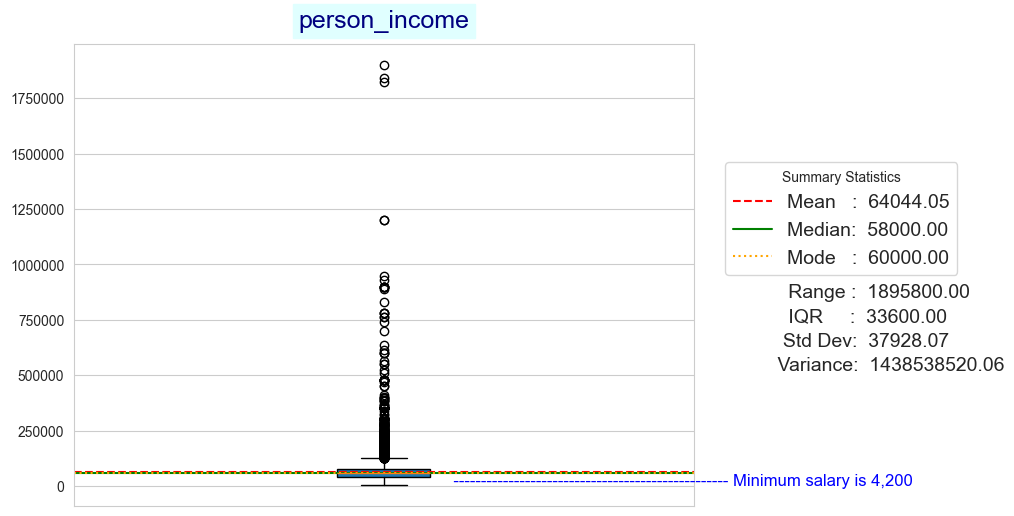

In [ ]:
boxplot_with_stats(train, 'person_income', annotation_start=850_000, annotation_spacing=110_000)
min_salary = train['person_income'].min()

plt.text(1, min_salary, ' ' * 15 + '-' * 50 + f' Minimum salary is {min_salary:,.0f}', horizontalalignment='left', color='blue', fontsize=12);

- **Feature 2 - person_home_ownership**

In [ ]:
def annotate_bars_vertically(ax):
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}',  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', 
                        va='center',  
                        fontsize=10,  
                        color='black',  
                        xytext=(0, 5),
                        textcoords='offset points')

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(8, 5))
home_ownership_order = train['person_home_ownership'].value_counts().index
ax = sns.countplot(x='person_home_ownership', data=train, hue='person_home_ownership', order=home_ownership_order)
annotate_bars_vertically(ax)
sns.despine();

In [ ]:
grouped_data = train.groupby(['person_home_ownership', 'loan_status']).size().unstack(fill_value=0)
grouped_data = grouped_data.reindex(['RENT', 'MORTGAGE', 'OWN', 'OTHER'])

sns.set_style('whitegrid')
ax = grouped_data.plot(kind='bar', figsize=(10, 5.5), width=0.8, color=['green', 'tomato'])
annotate_bars_vertically(ax)

plt.title('Loan Status by Home Ownership', color='navy', fontsize=13)
plt.xlabel('Home Ownership', color='navy', fontsize=13)
plt.ylabel('Frequency', color='navy', fontsize=13)

plt.legend(loc=(1.01, 0.5), title='Loan Status', fontsize=13, title_fontsize=13)
plt.xticks(rotation=0);

- **Feature 3 - person_emp_length**

In [ ]:
boxplot_with_stats(train, 'person_emp_length', annotation_start=55.5, annotation_spacing=8);

In [ ]:
train['person_emp_length'].max()

In [ ]:
invalid_rows = train[train['person_emp_length'] > train['person_age']]
invalid_rows

In [ ]:
train = train.drop(invalid_rows.index)

- **Feature 4 - loan_intent**

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(12.5, 5))
loan_intent_order = train['loan_intent'].value_counts().index
ax = sns.countplot(x='loan_intent', data=train, hue='loan_intent', order=loan_intent_order)
annotate_bars_vertically(ax)
sns.despine();

In [ ]:
grouped_data      = train.groupby(['loan_intent', 'loan_status']).size().unstack(fill_value=0)
loan_intent_order = train['loan_intent'].value_counts().index
grouped_data      = grouped_data.reindex(loan_intent_order)

sns.set_style('whitegrid')
ax = grouped_data.plot(kind='bar', figsize=(12.5, 5), width=0.8, color=['green', 'tomato'])
annotate_bars_vertically(ax)

plt.title('Loan Status by Loan Intent', color='navy', fontsize=13)
plt.xlabel('Loan Intent', color='navy', fontsize=13)
plt.ylabel('Frequency', color='navy', fontsize=13)

plt.legend(loc=(1.01, 0.5), title='Loan Status', fontsize=13, title_fontsize=13)
plt.xticks(rotation=0);

- **Feature 5 - loan_grade**

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(12.5, 5))
loan_grade_order = train['loan_grade'].value_counts().index
ax = sns.countplot(x='loan_grade', data=train, hue='loan_grade', order=loan_grade_order)
annotate_bars_vertically(ax)
sns.despine();

In [ ]:
grouped_data      = train.groupby(['loan_grade', 'loan_status']).size().unstack(fill_value=0)
loan_grade_order  = train['loan_grade'].value_counts().index
grouped_data      = grouped_data.reindex(loan_grade_order)

sns.set_style('whitegrid')
ax = grouped_data.plot(kind='bar', figsize=(12.5, 5), width=0.8, color=['green', 'tomato'])
annotate_bars_vertically(ax)

plt.title('Loan Status by Loan Grade', color='navy', fontsize=13)
plt.xlabel('Loan Grade', color='navy', fontsize=13)
plt.ylabel('Frequency', color='navy', fontsize=13)

plt.legend(loc=(1.01, 0.5), title='Loan Status', fontsize=13, title_fontsize=13)
plt.xticks(rotation=0);

- **Feature 6 - loan_amnt**

In [ ]:
boxplot_with_stats(train, 'loan_amnt', annotation_start=16_000, annotation_spacing=2_000);

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))
plt.title('Comparison of Loan Amount Between Approved and Rejected Loans', fontsize=16, color='navy', 
          backgroundcolor='lightcyan', pad=20)

sns.boxplot(train, x='loan_status', y='loan_amnt', hue='loan_status', palette=['green', 'tomato'])
plt.ylabel('Loan Amount', fontsize=13, color='navy')
plt.xlabel('Loan Status', fontsize=13, color='navy')
plt.xticks(ticks=[0, 1], labels=['Approved', 'Rejected'], fontsize=12);

- **Feature 7 - loan_int_rate**

In [ ]:
boxplot_with_stats(train, 'loan_int_rate', annotation_start=13.5, annotation_spacing=1);

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))
plt.title('Comparison of Loan Interest Rate Between Approved and Rejected Loans', fontsize=16, color='navy', 
          backgroundcolor='lightcyan', pad=20)

sns.boxplot(train, x='loan_status', y='loan_int_rate', hue='loan_status', palette=['green', 'tomato'])
plt.ylabel('Loan Interest Rate', fontsize=13, color='navy')
plt.xlabel('Loan Status', fontsize=13, color='navy')
plt.xticks(ticks=[0, 1], labels=['Approved', 'Rejected'], fontsize=12);

- **Feature 8 - loan_percent_income**

In [ ]:
boxplot_with_stats(train, 'loan_percent_income', annotation_start=0.37, annotation_spacing=0.05);

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))
plt.title('Comparison of Loan Percent Income Between Approved and Rejected Loans', fontsize=16, color='navy', 
          backgroundcolor='lightcyan', pad=20)

sns.boxplot(train, x='loan_status', y='loan_percent_income', hue='loan_status', palette=['green', 'tomato'])
plt.ylabel('Loan Percent Income', fontsize=13, color='navy')
plt.xlabel('Loan Status', fontsize=13, color='navy')
plt.xticks(ticks=[0, 1], labels=['Approved', 'Rejected'], fontsize=12);

- **Feature 9 - cb_person_default_on_file**

In [ ]:
train['cb_person_default_on_file'].value_counts().plot(kind='pie',
                                                       autopct='%1.1f%%',
                                                       startangle=30,
                                                       shadow=True,
                                                       explode=(0.1, 0.25),
                                                       wedgeprops={'edgecolor': 'gray'},
                                                       colors=['lightgreen', 'salmon'])
plt.axis('equal')
plt.ylabel('');

In [ ]:
person_default_yes = train[train['cb_person_default_on_file'] == 'Y']['loan_status'].value_counts().sort_index()
person_default_no  = train[train['cb_person_default_on_file'] == 'N']['loan_status'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 5.5)) 

wedge, _, _ = axes[0].pie(person_default_yes, labels=['Approved', 'Rejected'], autopct='%1.1f%%', startangle=55,
                          colors=['lightgreen', 'salmon'], explode=(0.1, 0.15), shadow=True, 
                          wedgeprops={'linewidth': 3}, textprops={'fontsize': 12})
axes[0].set_title('People with Default History', fontsize=16, color='navy', backgroundcolor='lightgray', y=0.96)

for wedge, color in zip(wedge, ['lightgreen', 'red']):
    wedge.set_edgecolor(color)

wedge, _, _ = axes[1].pie(person_default_no, labels=['Approved', 'Rejected'], autopct='%1.1f%%', startangle=25,
                          colors=['lightgreen', 'salmon'], explode=(0.1, 0.25), shadow=True, 
                          wedgeprops={'linewidth': 3}, textprops={'fontsize': 12})
axes[1].set_title('People without Default History', fontsize=16, color='navy', backgroundcolor='lightgray', y=0.96)

for wedge, color in zip(wedge, ['lightgreen', 'red']):
    wedge.set_edgecolor(color)

plt.suptitle('Ratio of Loan Status by Default History', fontsize=16, color='navy', backgroundcolor='lightcyan', y=0.92)
plt.tight_layout();

- **Feature 10 - cb_person_cred_hist_length**

In [ ]:
boxplot_with_stats(train, 'cb_person_cred_hist_length', annotation_start=14.6, annotation_spacing=1.5);

- **Feature 11 - loan_status**

In [ ]:
train['loan_status'].value_counts().plot(kind='pie',
                                         autopct='%1.1f%%',
                                         startangle=30,
                                         shadow=True,
                                         explode=(0.1, 0.25),
                                         wedgeprops={'edgecolor': 'gray'},
                                         colors=['lightgreen', 'salmon'])
plt.axis('equal')
plt.ylabel('');

In [ ]:
sns.set_style('ticks')
ax = sns.countplot(train, x='loan_status', hue='loan_status', legend=False, palette=['lightgreen', 'salmon'])
annotate_bars_vertically(ax)
sns.despine();

### `Section 4` - Splitting the Data into Training and Testing Sets

- 1

In [ ]:
X = train.drop('loan_status', axis=1)
y = train['loan_status']

- 2

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- 3

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### `Section 5` - Encoding Categorical Features

- 1 - Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

X_train_label_encoded = X_train.copy()
X_test_label_encoded  = X_test.copy()

categorical_cols = X_train.select_dtypes(include='object').columns
label_encoder    = LabelEncoder()

for col in categorical_cols:
    label_encoder.fit(X_train[col])
    X_train_label_encoded[col] = label_encoder.transform(X_train[col])
    X_test_label_encoded[col]  = label_encoder.transform(X_test[col])

X_train_label_encoded.head(3)

- 2 - One Hot Encoding

In [ ]:
X_train_one_hot_encoded = X_train.copy()
X_test_one_hot_encoded  = X_test.copy()

categorical_cols = X_train.select_dtypes(include='object').columns

X_train_one_hot_encoded = pd.get_dummies(X_train_one_hot_encoded, columns=categorical_cols, drop_first=True)
X_test_one_hot_encoded  = pd.get_dummies(X_test_one_hot_encoded,  columns=categorical_cols, drop_first=True)
X_test_one_hot_encoded  = X_test_one_hot_encoded.reindex(columns=X_train_one_hot_encoded.columns, fill_value=0)

X_train_one_hot_encoded.head(3)

- 3 - Target Encoding

In [ ]:
train_data_with_target                = X_train.copy()
train_data_with_target['loan_status'] = y_train

X_train_target_encoded = X_train.copy()
X_test_target_encoded  = X_test.copy()

categorical_cols = X_train.select_dtypes(include='object').columns

for col in categorical_cols:
    means = train_data_with_target.groupby(col)['loan_status'].mean()
    
    X_train_target_encoded[col] = X_train[col].map(means)
    X_test_target_encoded[col]  = X_test[col].map(means)

X_train_target_encoded.head(3)

- 4 - Leave One Out Encoding

In [ ]:
import category_encoders as ce

X_train_loo_encoded = X_train.copy()
X_test_loo_encoded  = X_test.copy()

loo_encoder = ce.LeaveOneOutEncoder(cols=categorical_cols, random_state=42)

X_train_loo_encoded = loo_encoder.fit_transform(X_train, y_train)
X_test_loo_encoded  = loo_encoder.transform(X_test)

X_train_loo_encoded.head(3)

- 5 - Ordinal Encoding

In [ ]:
X_train_ordinal_encoded = X_train.copy()
X_test_ordinal_encoded  = X_test.copy()

X_train_ordinal_encoded['cb_person_default_on_file'] = X_train_ordinal_encoded['cb_person_default_on_file'].map({'N': 0, 
                                                                                                                 'Y': 1})
X_test_ordinal_encoded['cb_person_default_on_file']  = X_test_ordinal_encoded['cb_person_default_on_file'].map({'N': 0, 
                                                                                                                'Y': 1})

X_train_ordinal_encoded['loan_grade'] = X_train_ordinal_encoded['loan_grade'].map({'A': 0, 
                                                                                   'B': 1, 
                                                                                   'C': 2, 
                                                                                   'D': 3, 
                                                                                   'E': 4, 
                                                                                   'F': 5, 
                                                                                   'G': 6})
X_test_ordinal_encoded['loan_grade']  = X_test_ordinal_encoded['loan_grade'].map({'A': 0, 
                                                                                  'B': 1, 
                                                                                  'C': 2, 
                                                                                  'D': 3, 
                                                                                  'E': 4, 
                                                                                  'F': 5, 
                                                                                  'G': 6})

X_train_ordinal_encoded['loan_intent'] = X_train_ordinal_encoded['loan_intent'].map({'VENTURE'          : 0, 
                                                                                     'EDUCATION'        : 1, 
                                                                                     'PERSONAL'         : 2, 
                                                                                     'HOMEIMPROVEMENT'  : 3, 
                                                                                     'MEDICAL'          : 4, 
                                                                                     'DEBTCONSOLIDATION': 5})
X_test_ordinal_encoded['loan_intent']  = X_test_ordinal_encoded['loan_intent'].map({'VENTURE'          : 0, 
                                                                                    'EDUCATION'        : 1, 
                                                                                    'PERSONAL'         : 2, 
                                                                                    'HOMEIMPROVEMENT'  : 3, 
                                                                                    'MEDICAL'          : 4, 
                                                                                    'DEBTCONSOLIDATION': 5})

X_train_ordinal_encoded['person_home_ownership'] = X_train_ordinal_encoded['person_home_ownership'].map({'OWN': 0, 
                                                                                                         'MORTGAGE': 1, 
                                                                                                         'OTHER': 2, 
                                                                                                         'RENT': 3})
X_test_ordinal_encoded['person_home_ownership']  = X_test_ordinal_encoded['person_home_ownership'].map({'OWN': 0, 
                                                                                                        'MORTGAGE': 1, 
                                                                                                        'OTHER': 2, 
                                                                                                        'RENT': 3})

X_train_ordinal_encoded.head(3)

- 6 - Mixed Encoding

In [ ]:
X_train_mixed_encoded = X_train.copy()
X_test_mixed_encoded  = X_test.copy()

X_train_mixed_encoded['cb_person_default_on_file'] = X_train_mixed_encoded['cb_person_default_on_file'].map({'N': 0, 'Y': 1})
X_test_mixed_encoded['cb_person_default_on_file']  = X_test_mixed_encoded['cb_person_default_on_file'].map({'N': 0, 'Y': 1})

X_train_mixed_encoded['loan_grade'] = X_train_mixed_encoded['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
X_test_mixed_encoded['loan_grade']  = X_test_mixed_encoded['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

train_data_with_target                = X_train.copy()
train_data_with_target['loan_status'] = y_train

remaining_categorical_cols = X_train.select_dtypes(include='object').columns
remaining_categorical_cols = remaining_categorical_cols.difference(['cb_person_default_on_file', 'loan_grade'])

for col in remaining_categorical_cols:
    means                      = train_data_with_target.groupby(col)['loan_status'].mean()
    X_train_mixed_encoded[col] = X_train_mixed_encoded[col].map(means)
    X_test_mixed_encoded[col]  = X_test_mixed_encoded[col].map(means)

X_train_mixed_encoded.head(3)

### `Section 6` - Oversampling and Undersampling

- 1

In [ ]:
y_train.value_counts()

- 2 - No Sampling

In [ ]:
X_train_label_encoded_without_sampling = X_train_label_encoded
y_train_label_encoded_without_sampling = y_train

X_train_one_hot_encoded_without_sampling = X_train_one_hot_encoded
y_train_one_hot_encoded_without_sampling = y_train

X_train_target_encoded_without_sampling = X_train_target_encoded
y_train_target_encoded_without_sampling = y_train

X_train_loo_encoded_without_sampling = X_train_loo_encoded
y_train_loo_encoded_without_sampling = y_train

X_train_ordinal_encoded_without_sampling = X_train_ordinal_encoded
y_train_ordinal_encoded_without_sampling = y_train

X_train_mixed_encoded_without_sampling = X_train_mixed_encoded
y_train_mixed_encoded_without_sampling = y_train

- 3 - Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

random_oversampler = RandomOverSampler(random_state=42)
X_train_label_encoded_random_oversampled, y_train_label_encoded_random_oversampled = random_oversampler.fit_resample(
    X_train_label_encoded_without_sampling, y_train_label_encoded_without_sampling)

X_train_one_hot_encoded_random_oversampled, y_train_one_hot_encoded_random_oversampled = random_oversampler.fit_resample(
    X_train_one_hot_encoded_without_sampling, y_train_one_hot_encoded_without_sampling)

X_train_target_encoded_random_oversampled, y_train_target_encoded_random_oversampled = random_oversampler.fit_resample(
    X_train_target_encoded_without_sampling, y_train_target_encoded_without_sampling)

X_train_loo_encoded_random_oversampled, y_train_loo_encoded_random_oversampled = random_oversampler.fit_resample(
    X_train_loo_encoded_without_sampling, y_train_loo_encoded_without_sampling)

X_train_ordinal_encoded_random_oversampled, y_train_ordinal_encoded_random_oversampled = random_oversampler.fit_resample(
    X_train_ordinal_encoded_without_sampling, y_train_ordinal_encoded_without_sampling)

X_train_mixed_encoded_random_oversampled, y_train_mixed_encoded_random_oversampled = random_oversampler.fit_resample(
    X_train_mixed_encoded_without_sampling, y_train_mixed_encoded_without_sampling)

y_train_label_encoded_random_oversampled.value_counts()

- 4 - SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote_oversampler = SMOTE(random_state=42)
X_train_label_encoded_smote_oversampled, y_train_label_encoded_smote_oversampled = smote_oversampler.fit_resample(
    X_train_label_encoded_without_sampling, y_train_label_encoded_without_sampling)

X_train_one_hot_encoded_smote_oversampled, y_train_one_hot_encoded_smote_oversampled = smote_oversampler.fit_resample(
    X_train_one_hot_encoded_without_sampling, y_train_one_hot_encoded_without_sampling)

X_train_target_encoded_smote_oversampled, y_train_target_encoded_smote_oversampled = smote_oversampler.fit_resample(
    X_train_target_encoded_without_sampling, y_train_target_encoded_without_sampling)

X_train_loo_encoded_smote_oversampled, y_train_loo_encoded_smote_oversampled = smote_oversampler.fit_resample(
    X_train_loo_encoded_without_sampling, y_train_loo_encoded_without_sampling)

X_train_ordinal_encoded_smote_oversampled, y_train_ordinal_encoded_smote_oversampled = smote_oversampler.fit_resample(
    X_train_ordinal_encoded_without_sampling, y_train_ordinal_encoded_without_sampling)

X_train_mixed_encoded_smote_oversampled, y_train_mixed_encoded_smote_oversampled = smote_oversampler.fit_resample(
    X_train_mixed_encoded_without_sampling, y_train_mixed_encoded_without_sampling)

y_train_label_encoded_smote_oversampled.value_counts()

- 5 - Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

random_undersampler = RandomUnderSampler(random_state=42)
X_train_label_encoded_random_undersampled, y_train_label_encoded_random_undersampled = random_undersampler.fit_resample(
    X_train_label_encoded_without_sampling, y_train_label_encoded_without_sampling)

X_train_one_hot_encoded_random_undersampled, y_train_one_hot_encoded_random_undersampled = random_undersampler.fit_resample(
    X_train_one_hot_encoded_without_sampling, y_train_one_hot_encoded_without_sampling)

X_train_target_encoded_random_undersampled, y_train_target_encoded_random_undersampled = random_undersampler.fit_resample(
    X_train_target_encoded_without_sampling, y_train_target_encoded_without_sampling)

X_train_loo_encoded_random_undersampled, y_train_loo_encoded_random_undersampled = random_undersampler.fit_resample(
    X_train_loo_encoded_without_sampling, y_train_loo_encoded_without_sampling)

X_train_ordinal_encoded_random_undersampled, y_train_ordinal_encoded_random_undersampled = random_undersampler.fit_resample(
    X_train_ordinal_encoded_without_sampling, y_train_ordinal_encoded_without_sampling)

X_train_mixed_encoded_random_undersampled, y_train_mixed_encoded_random_undersampled = random_undersampler.fit_resample(
    X_train_mixed_encoded_without_sampling, y_train_mixed_encoded_without_sampling)

y_train_label_encoded_random_undersampled.value_counts()

- 6 - Tomek Links Undersampling

In [ ]:
from imblearn.under_sampling import TomekLinks

tomeklinks_undersampler = TomekLinks(sampling_strategy='majority')
X_train_label_encoded_tomeklinks_undersampled, y_train_label_encoded_tomeklinks_undersampled = tomeklinks_undersampler.fit_resample(
    X_train_label_encoded_without_sampling, y_train_label_encoded_without_sampling)

X_train_one_hot_encoded_tomeklinks_undersampled, y_train_one_hot_encoded_tomeklinks_undersampled = tomeklinks_undersampler.fit_resample(
    X_train_one_hot_encoded_without_sampling, y_train_one_hot_encoded_without_sampling)

X_train_target_encoded_tomeklinks_undersampled, y_train_target_encoded_tomeklinks_undersampled = tomeklinks_undersampler.fit_resample(
    X_train_target_encoded_without_sampling, y_train_target_encoded_without_sampling)

X_train_loo_encoded_tomeklinks_undersampled, y_train_loo_encoded_tomeklinks_undersampled = tomeklinks_undersampler.fit_resample(
    X_train_loo_encoded_without_sampling, y_train_loo_encoded_without_sampling)

X_train_ordinal_encoded_tomeklinks_undersampled, y_train_ordinal_encoded_tomeklinks_undersampled = tomeklinks_undersampler.fit_resample(
    X_train_ordinal_encoded_without_sampling, y_train_ordinal_encoded_without_sampling)

X_train_mixed_encoded_tomeklinks_undersampled, y_train_mixed_encoded_tomeklinks_undersampled = tomeklinks_undersampler.fit_resample(
    X_train_mixed_encoded_without_sampling, y_train_mixed_encoded_without_sampling)

y_train_label_encoded_tomeklinks_undersampled.value_counts()

### `Section 7` - Feature Scaling

- 1 - No Scaling

In [ ]:
# 1. Without Sampling
X_train_label_encoded_no_Scaling = X_train_label_encoded_without_sampling
X_test_label_encoded_no_Scaling  = X_test_label_encoded

X_train_one_hot_encoded_no_Scaling = X_train_one_hot_encoded_without_sampling
X_test_one_hot_encoded_no_Scaling  = X_test_one_hot_encoded

X_train_target_encoded_no_Scaling = X_train_target_encoded_without_sampling
X_test_target_encoded_no_Scaling  = X_test_target_encoded

X_train_loo_encoded_no_Scaling = X_train_loo_encoded_without_sampling
X_test_loo_encoded_no_Scaling  = X_test_loo_encoded

X_train_ordinal_encoded_no_Scaling = X_train_ordinal_encoded_without_sampling
X_test_ordinal_encoded_no_Scaling  = X_test_ordinal_encoded

X_train_mixed_encoded_no_Scaling = X_train_mixed_encoded_without_sampling
X_test_mixed_encoded_no_Scaling  = X_test_mixed_encoded

# 2. Random Oversampled
X_train_label_encoded_random_oversampled_no_Scaling = X_train_label_encoded_random_oversampled
X_test_label_encoded_random_oversampled_no_Scaling  = X_test_label_encoded

X_train_one_hot_encoded_random_oversampled_no_Scaling = X_train_one_hot_encoded_random_oversampled
X_test_one_hot_encoded_random_oversampled_no_Scaling  = X_test_one_hot_encoded

X_train_target_encoded_random_oversampled_no_Scaling = X_train_target_encoded_random_oversampled
X_test_target_encoded_random_oversampled_no_Scaling  = X_test_target_encoded

X_train_loo_encoded_random_oversampled_no_Scaling = X_train_loo_encoded_random_oversampled
X_test_loo_encoded_random_oversampled_no_Scaling  = X_test_loo_encoded

X_train_ordinal_encoded_random_oversampled_no_Scaling = X_train_ordinal_encoded_random_oversampled
X_test_ordinal_encoded_random_oversampled_no_Scaling  = X_test_ordinal_encoded

X_train_mixed_encoded_random_oversampled_no_Scaling = X_train_mixed_encoded_random_oversampled
X_test_mixed_encoded_random_oversampled_no_Scaling  = X_test_mixed_encoded

# 3. SMOTE Oversampled
X_train_label_encoded_smote_oversampled_no_Scaling = X_train_label_encoded_smote_oversampled
X_test_label_encoded_smote_oversampled_no_Scaling  = X_test_label_encoded

X_train_one_hot_encoded_smote_oversampled_no_Scaling = X_train_one_hot_encoded_smote_oversampled
X_test_one_hot_encoded_smote_oversampled_no_Scaling  = X_test_one_hot_encoded

X_train_target_encoded_smote_oversampled_no_Scaling = X_train_target_encoded_smote_oversampled
X_test_target_encoded_smote_oversampled_no_Scaling  = X_test_target_encoded

X_train_loo_encoded_smote_oversampled_no_Scaling = X_train_loo_encoded_smote_oversampled
X_test_loo_encoded_smote_oversampled_no_Scaling  = X_test_loo_encoded

X_train_ordinal_encoded_smote_oversampled_no_Scaling = X_train_ordinal_encoded_smote_oversampled
X_test_ordinal_encoded_smote_oversampled_no_Scaling  = X_test_ordinal_encoded

X_train_mixed_encoded_smote_oversampled_no_Scaling = X_train_mixed_encoded_smote_oversampled
X_test_mixed_encoded_smote_oversampled_no_Scaling  = X_test_mixed_encoded

# 4. Random Undersampled
X_train_label_encoded_random_undersampled_no_Scaling = X_train_label_encoded_random_undersampled
X_test_label_encoded_random_undersampled_no_Scaling  = X_test_label_encoded

X_train_one_hot_encoded_random_undersampled_no_Scaling = X_train_one_hot_encoded_random_undersampled
X_test_one_hot_encoded_random_undersampled_no_Scaling  = X_test_one_hot_encoded

X_train_target_encoded_random_undersampled_no_Scaling = X_train_target_encoded_random_undersampled
X_test_target_encoded_random_undersampled_no_Scaling  = X_test_target_encoded

X_train_loo_encoded_random_undersampled_no_Scaling = X_train_loo_encoded_random_undersampled
X_test_loo_encoded_random_undersampled_no_Scaling  = X_test_loo_encoded

X_train_ordinal_encoded_random_undersampled_no_Scaling = X_train_ordinal_encoded_random_undersampled
X_test_ordinal_encoded_random_undersampled_no_Scaling  = X_test_ordinal_encoded

X_train_mixed_encoded_random_undersampled_no_Scaling = X_train_mixed_encoded_random_undersampled
X_test_mixed_encoded_random_undersampled_no_Scaling  = X_test_mixed_encoded

# 5. TomekLinks Undersampled
X_train_label_encoded_tomeklinks_undersampled_no_Scaling = X_train_label_encoded_tomeklinks_undersampled
X_test_label_encoded_tomeklinks_undersampled_no_Scaling  = X_test_label_encoded

X_train_one_hot_encoded_tomeklinks_undersampled_no_Scaling = X_train_one_hot_encoded_tomeklinks_undersampled
X_test_one_hot_encoded_tomeklinks_undersampled_no_Scaling  = X_test_one_hot_encoded

X_train_target_encoded_tomeklinks_undersampled_no_Scaling = X_train_target_encoded_tomeklinks_undersampled
X_test_target_encoded_tomeklinks_undersampled_no_Scaling  = X_test_target_encoded

X_train_loo_encoded_tomeklinks_undersampled_no_Scaling = X_train_loo_encoded_tomeklinks_undersampled
X_test_loo_encoded_tomeklinks_undersampled_no_Scaling  = X_test_loo_encoded

X_train_ordinal_encoded_tomeklinks_undersampled_no_Scaling = X_train_ordinal_encoded_tomeklinks_undersampled
X_test_ordinal_encoded_tomeklinks_undersampled_no_Scaling  = X_test_ordinal_encoded

X_train_mixed_encoded_tomeklinks_undersampled_no_Scaling = X_train_mixed_encoded_tomeklinks_undersampled
X_test_mixed_encoded_tomeklinks_undersampled_no_Scaling  = X_test_mixed_encoded

- 2 - MinMax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# 1. Without Sampling
scaler_without_sampling                       = MinMaxScaler()
X_train_label_encoded_MinMax                  = X_train_label_encoded_without_sampling.copy()
X_test_label_encoded_MinMax                   = X_test_label_encoded.copy()
X_train_label_encoded_MinMax[numeric_columns] = scaler_without_sampling.fit_transform(X_train_label_encoded_without_sampling[numeric_columns])
X_test_label_encoded_MinMax[numeric_columns]  = scaler_without_sampling.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_MinMax                  = X_train_one_hot_encoded_without_sampling.copy()
X_test_one_hot_encoded_MinMax                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_MinMax[numeric_columns] = scaler_without_sampling.fit_transform(X_train_one_hot_encoded_without_sampling[numeric_columns])
X_test_one_hot_encoded_MinMax[numeric_columns]  = scaler_without_sampling.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_MinMax                  = X_train_target_encoded_without_sampling.copy()
X_test_target_encoded_MinMax                   = X_test_target_encoded.copy()
X_train_target_encoded_MinMax[numeric_columns] = scaler_without_sampling.fit_transform(X_train_target_encoded_without_sampling[numeric_columns])
X_test_target_encoded_MinMax[numeric_columns]  = scaler_without_sampling.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_MinMax                  = X_train_loo_encoded_without_sampling.copy()
X_test_loo_encoded_MinMax                   = X_test_loo_encoded.copy()
X_train_loo_encoded_MinMax[numeric_columns] = scaler_without_sampling.fit_transform(X_train_loo_encoded_without_sampling[numeric_columns])
X_test_loo_encoded_MinMax[numeric_columns]  = scaler_without_sampling.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_MinMax                  = X_train_ordinal_encoded_without_sampling.copy()
X_test_ordinal_encoded_MinMax                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_MinMax[numeric_columns] = scaler_without_sampling.fit_transform(X_train_ordinal_encoded_without_sampling[numeric_columns])
X_test_ordinal_encoded_MinMax[numeric_columns]  = scaler_without_sampling.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_MinMax                  = X_train_mixed_encoded_without_sampling.copy()
X_test_mixed_encoded_MinMax                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_MinMax[numeric_columns] = scaler_without_sampling.fit_transform(X_train_mixed_encoded_without_sampling[numeric_columns])
X_test_mixed_encoded_MinMax[numeric_columns]  = scaler_without_sampling.transform(X_test_mixed_encoded[numeric_columns])

# 2. Random Oversampled
scaler_random_oversampled                                        = MinMaxScaler()
X_train_label_encoded_random_oversampled_MinMax                  = X_train_label_encoded_random_oversampled.copy()
X_test_label_encoded_random_oversampled_MinMax                   = X_test_label_encoded.copy()
X_train_label_encoded_random_oversampled_MinMax[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_label_encoded_random_oversampled[numeric_columns])
X_test_label_encoded_random_oversampled_MinMax[numeric_columns]  = scaler_random_oversampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_random_oversampled_MinMax                  = X_train_one_hot_encoded_random_oversampled.copy()
X_test_one_hot_encoded_random_oversampled_MinMax                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_random_oversampled_MinMax[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_one_hot_encoded_random_oversampled[numeric_columns])
X_test_one_hot_encoded_random_oversampled_MinMax[numeric_columns]  = scaler_random_oversampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_random_oversampled_MinMax                  = X_train_target_encoded_random_oversampled.copy()
X_test_target_encoded_random_oversampled_MinMax                   = X_test_target_encoded.copy()
X_train_target_encoded_random_oversampled_MinMax[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_target_encoded_random_oversampled[numeric_columns])
X_test_target_encoded_random_oversampled_MinMax[numeric_columns]  = scaler_random_oversampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_random_oversampled_MinMax                  = X_train_loo_encoded_random_oversampled.copy()
X_test_loo_encoded_random_oversampled_MinMax                   = X_test_loo_encoded.copy()
X_train_loo_encoded_random_oversampled_MinMax[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_loo_encoded_random_oversampled[numeric_columns])
X_test_loo_encoded_random_oversampled_MinMax[numeric_columns]  = scaler_random_oversampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_random_oversampled_MinMax                  = X_train_ordinal_encoded_random_oversampled.copy()
X_test_ordinal_encoded_random_oversampled_MinMax                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_random_oversampled_MinMax[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_ordinal_encoded_random_oversampled[numeric_columns])
X_test_ordinal_encoded_random_oversampled_MinMax[numeric_columns]  = scaler_random_oversampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_random_oversampled_MinMax                  = X_train_mixed_encoded_random_oversampled.copy()
X_test_mixed_encoded_random_oversampled_MinMax                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_random_oversampled_MinMax[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_mixed_encoded_random_oversampled[numeric_columns])
X_test_mixed_encoded_random_oversampled_MinMax[numeric_columns]  = scaler_random_oversampled.transform(X_test_mixed_encoded[numeric_columns])

# 3. SMOTE Oversampled
scaler_smote_oversampled                                        = MinMaxScaler()
X_train_label_encoded_smote_oversampled_MinMax                  = X_train_label_encoded_smote_oversampled.copy()
X_test_label_encoded_smote_oversampled_MinMax                   = X_test_label_encoded.copy()
X_train_label_encoded_smote_oversampled_MinMax[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_label_encoded_smote_oversampled[numeric_columns])
X_test_label_encoded_smote_oversampled_MinMax[numeric_columns]  = scaler_smote_oversampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_smote_oversampled_MinMax                  = X_train_one_hot_encoded_smote_oversampled.copy()
X_test_one_hot_encoded_smote_oversampled_MinMax                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_smote_oversampled_MinMax[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_one_hot_encoded_smote_oversampled[numeric_columns])
X_test_one_hot_encoded_smote_oversampled_MinMax[numeric_columns]  = scaler_smote_oversampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_smote_oversampled_MinMax                  = X_train_target_encoded_smote_oversampled.copy()
X_test_target_encoded_smote_oversampled_MinMax                   = X_test_target_encoded.copy()
X_train_target_encoded_smote_oversampled_MinMax[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_target_encoded_smote_oversampled[numeric_columns])
X_test_target_encoded_smote_oversampled_MinMax[numeric_columns]  = scaler_smote_oversampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_smote_oversampled_MinMax                  = X_train_loo_encoded_smote_oversampled.copy()
X_test_loo_encoded_smote_oversampled_MinMax                   = X_test_loo_encoded.copy()
X_train_loo_encoded_smote_oversampled_MinMax[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_loo_encoded_smote_oversampled[numeric_columns])
X_test_loo_encoded_smote_oversampled_MinMax[numeric_columns]  = scaler_smote_oversampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_smote_oversampled_MinMax                  = X_train_ordinal_encoded_smote_oversampled.copy()
X_test_ordinal_encoded_smote_oversampled_MinMax                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_smote_oversampled_MinMax[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_ordinal_encoded_smote_oversampled[numeric_columns])
X_test_ordinal_encoded_smote_oversampled_MinMax[numeric_columns]  = scaler_smote_oversampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_smote_oversampled_MinMax                  = X_train_mixed_encoded_smote_oversampled.copy()
X_test_mixed_encoded_smote_oversampled_MinMax                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_smote_oversampled_MinMax[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_mixed_encoded_smote_oversampled[numeric_columns])
X_test_mixed_encoded_smote_oversampled_MinMax[numeric_columns]  = scaler_smote_oversampled.transform(X_test_mixed_encoded[numeric_columns])

# 4. Random Undersampled
scaler_random_undersampled                                        = MinMaxScaler()
X_train_label_encoded_random_undersampled_MinMax                  = X_train_label_encoded_random_undersampled.copy()
X_test_label_encoded_random_undersampled_MinMax                   = X_test_label_encoded.copy()
X_train_label_encoded_random_undersampled_MinMax[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_label_encoded_random_undersampled[numeric_columns])
X_test_label_encoded_random_undersampled_MinMax[numeric_columns]  = scaler_random_undersampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_random_undersampled_MinMax                  = X_train_one_hot_encoded_random_undersampled.copy()
X_test_one_hot_encoded_random_undersampled_MinMax                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_random_undersampled_MinMax[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_one_hot_encoded_random_undersampled[numeric_columns])
X_test_one_hot_encoded_random_undersampled_MinMax[numeric_columns]  = scaler_random_undersampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_random_undersampled_MinMax                  = X_train_target_encoded_random_undersampled.copy()
X_test_target_encoded_random_undersampled_MinMax                   = X_test_target_encoded.copy()
X_train_target_encoded_random_undersampled_MinMax[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_target_encoded_random_undersampled[numeric_columns])
X_test_target_encoded_random_undersampled_MinMax[numeric_columns]  = scaler_random_undersampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_random_undersampled_MinMax                  = X_train_loo_encoded_random_undersampled.copy()
X_test_loo_encoded_random_undersampled_MinMax                   = X_test_loo_encoded.copy()
X_train_loo_encoded_random_undersampled_MinMax[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_loo_encoded_random_undersampled[numeric_columns])
X_test_loo_encoded_random_undersampled_MinMax[numeric_columns]  = scaler_random_undersampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_random_undersampled_MinMax                  = X_train_ordinal_encoded_random_undersampled.copy()
X_test_ordinal_encoded_random_undersampled_MinMax                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_random_undersampled_MinMax[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_ordinal_encoded_random_undersampled[numeric_columns])
X_test_ordinal_encoded_random_undersampled_MinMax[numeric_columns]  = scaler_random_undersampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_random_undersampled_MinMax                  = X_train_mixed_encoded_random_undersampled.copy()
X_test_mixed_encoded_random_undersampled_MinMax                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_random_undersampled_MinMax[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_mixed_encoded_random_undersampled[numeric_columns])
X_test_mixed_encoded_random_undersampled_MinMax[numeric_columns]  = scaler_random_undersampled.transform(X_test_mixed_encoded[numeric_columns])

# 5. TomekLinks Undersampled
scaler_tomeklinks_undersampled                                        = MinMaxScaler()
X_train_label_encoded_tomeklinks_undersampled_MinMax                  = X_train_label_encoded_tomeklinks_undersampled.copy()
X_test_label_encoded_tomeklinks_undersampled_MinMax                   = X_test_label_encoded.copy()
X_train_label_encoded_tomeklinks_undersampled_MinMax[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_label_encoded_tomeklinks_undersampled[numeric_columns])
X_test_label_encoded_tomeklinks_undersampled_MinMax[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_tomeklinks_undersampled_MinMax                  = X_train_one_hot_encoded_tomeklinks_undersampled.copy()
X_test_one_hot_encoded_tomeklinks_undersampled_MinMax                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_tomeklinks_undersampled_MinMax[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_one_hot_encoded_tomeklinks_undersampled[numeric_columns])
X_test_one_hot_encoded_tomeklinks_undersampled_MinMax[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_tomeklinks_undersampled_MinMax                  = X_train_target_encoded_tomeklinks_undersampled.copy()
X_test_target_encoded_tomeklinks_undersampled_MinMax                   = X_test_target_encoded.copy()
X_train_target_encoded_tomeklinks_undersampled_MinMax[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_target_encoded_tomeklinks_undersampled[numeric_columns])
X_test_target_encoded_tomeklinks_undersampled_MinMax[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_tomeklinks_undersampled_MinMax                  = X_train_loo_encoded_tomeklinks_undersampled.copy()
X_test_loo_encoded_tomeklinks_undersampled_MinMax                   = X_test_loo_encoded.copy()
X_train_loo_encoded_tomeklinks_undersampled_MinMax[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_loo_encoded_tomeklinks_undersampled[numeric_columns])
X_test_loo_encoded_tomeklinks_undersampled_MinMax[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_tomeklinks_undersampled_MinMax                  = X_train_ordinal_encoded_tomeklinks_undersampled.copy()
X_test_ordinal_encoded_tomeklinks_undersampled_MinMax                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_tomeklinks_undersampled_MinMax[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_ordinal_encoded_tomeklinks_undersampled[numeric_columns])
X_test_ordinal_encoded_tomeklinks_undersampled_MinMax[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_tomeklinks_undersampled_MinMax                  = X_train_mixed_encoded_tomeklinks_undersampled.copy()
X_test_mixed_encoded_tomeklinks_undersampled_MinMax                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_tomeklinks_undersampled_MinMax[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_mixed_encoded_tomeklinks_undersampled[numeric_columns])
X_test_mixed_encoded_tomeklinks_undersampled_MinMax[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_mixed_encoded[numeric_columns])

- 3 - Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Without Sampling
scaler_without_sampling                         = StandardScaler()
X_train_label_encoded_Standard                  = X_train_label_encoded_without_sampling.copy()
X_test_label_encoded_Standard                   = X_test_label_encoded.copy()
X_train_label_encoded_Standard[numeric_columns] = scaler_without_sampling.fit_transform(X_train_label_encoded_without_sampling[numeric_columns])
X_test_label_encoded_Standard[numeric_columns]  = scaler_without_sampling.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_Standard                  = X_train_one_hot_encoded_without_sampling.copy()
X_test_one_hot_encoded_Standard                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_Standard[numeric_columns] = scaler_without_sampling.fit_transform(X_train_one_hot_encoded_without_sampling[numeric_columns])
X_test_one_hot_encoded_Standard[numeric_columns]  = scaler_without_sampling.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_Standard                  = X_train_target_encoded_without_sampling.copy()
X_test_target_encoded_Standard                   = X_test_target_encoded.copy()
X_train_target_encoded_Standard[numeric_columns] = scaler_without_sampling.fit_transform(X_train_target_encoded_without_sampling[numeric_columns])
X_test_target_encoded_Standard[numeric_columns]  = scaler_without_sampling.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_Standard                  = X_train_loo_encoded_without_sampling.copy()
X_test_loo_encoded_Standard                   = X_test_loo_encoded.copy()
X_train_loo_encoded_Standard[numeric_columns] = scaler_without_sampling.fit_transform(X_train_loo_encoded_without_sampling[numeric_columns])
X_test_loo_encoded_Standard[numeric_columns]  = scaler_without_sampling.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_Standard                  = X_train_ordinal_encoded_without_sampling.copy()
X_test_ordinal_encoded_Standard                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_Standard[numeric_columns] = scaler_without_sampling.fit_transform(X_train_ordinal_encoded_without_sampling[numeric_columns])
X_test_ordinal_encoded_Standard[numeric_columns]  = scaler_without_sampling.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_Standard                  = X_train_mixed_encoded_without_sampling.copy()
X_test_mixed_encoded_Standard                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_Standard[numeric_columns] = scaler_without_sampling.fit_transform(X_train_mixed_encoded_without_sampling[numeric_columns])
X_test_mixed_encoded_Standard[numeric_columns]  = scaler_without_sampling.transform(X_test_mixed_encoded[numeric_columns])

# 2. Random Oversampled
scaler_random_oversampled                                          = StandardScaler()
X_train_label_encoded_random_oversampled_Standard                  = X_train_label_encoded_random_oversampled.copy()
X_test_label_encoded_random_oversampled_Standard                   = X_test_label_encoded.copy()
X_train_label_encoded_random_oversampled_Standard[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_label_encoded_random_oversampled[numeric_columns])
X_test_label_encoded_random_oversampled_Standard[numeric_columns]  = scaler_random_oversampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_random_oversampled_Standard                  = X_train_one_hot_encoded_random_oversampled.copy()
X_test_one_hot_encoded_random_oversampled_Standard                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_random_oversampled_Standard[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_one_hot_encoded_random_oversampled[numeric_columns])
X_test_one_hot_encoded_random_oversampled_Standard[numeric_columns]  = scaler_random_oversampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_random_oversampled_Standard                  = X_train_target_encoded_random_oversampled.copy()
X_test_target_encoded_random_oversampled_Standard                   = X_test_target_encoded.copy()
X_train_target_encoded_random_oversampled_Standard[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_target_encoded_random_oversampled[numeric_columns])
X_test_target_encoded_random_oversampled_Standard[numeric_columns]  = scaler_random_oversampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_random_oversampled_Standard                  = X_train_loo_encoded_random_oversampled.copy()
X_test_loo_encoded_random_oversampled_Standard                   = X_test_loo_encoded.copy()
X_train_loo_encoded_random_oversampled_Standard[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_loo_encoded_random_oversampled[numeric_columns])
X_test_loo_encoded_random_oversampled_Standard[numeric_columns]  = scaler_random_oversampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_random_oversampled_Standard                  = X_train_ordinal_encoded_random_oversampled.copy()
X_test_ordinal_encoded_random_oversampled_Standard                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_random_oversampled_Standard[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_ordinal_encoded_random_oversampled[numeric_columns])
X_test_ordinal_encoded_random_oversampled_Standard[numeric_columns]  = scaler_random_oversampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_random_oversampled_Standard                  = X_train_mixed_encoded_random_oversampled.copy()
X_test_mixed_encoded_random_oversampled_Standard                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_random_oversampled_Standard[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_mixed_encoded_random_oversampled[numeric_columns])
X_test_mixed_encoded_random_oversampled_Standard[numeric_columns]  = scaler_random_oversampled.transform(X_test_mixed_encoded[numeric_columns])

# 3. SMOTE Oversampled
scaler_smote_oversampled                                          = StandardScaler()
X_train_label_encoded_smote_oversampled_Standard                  = X_train_label_encoded_smote_oversampled.copy()
X_test_label_encoded_smote_oversampled_Standard                   = X_test_label_encoded.copy()
X_train_label_encoded_smote_oversampled_Standard[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_label_encoded_smote_oversampled[numeric_columns])
X_test_label_encoded_smote_oversampled_Standard[numeric_columns]  = scaler_smote_oversampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_smote_oversampled_Standard                  = X_train_one_hot_encoded_smote_oversampled.copy()
X_test_one_hot_encoded_smote_oversampled_Standard                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_smote_oversampled_Standard[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_one_hot_encoded_smote_oversampled[numeric_columns])
X_test_one_hot_encoded_smote_oversampled_Standard[numeric_columns]  = scaler_smote_oversampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_smote_oversampled_Standard                  = X_train_target_encoded_smote_oversampled.copy()
X_test_target_encoded_smote_oversampled_Standard                   = X_test_target_encoded.copy()
X_train_target_encoded_smote_oversampled_Standard[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_target_encoded_smote_oversampled[numeric_columns])
X_test_target_encoded_smote_oversampled_Standard[numeric_columns]  = scaler_smote_oversampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_smote_oversampled_Standard                  = X_train_loo_encoded_smote_oversampled.copy()
X_test_loo_encoded_smote_oversampled_Standard                   = X_test_loo_encoded.copy()
X_train_loo_encoded_smote_oversampled_Standard[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_loo_encoded_smote_oversampled[numeric_columns])
X_test_loo_encoded_smote_oversampled_Standard[numeric_columns]  = scaler_smote_oversampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_smote_oversampled_Standard                  = X_train_ordinal_encoded_smote_oversampled.copy()
X_test_ordinal_encoded_smote_oversampled_Standard                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_smote_oversampled_Standard[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_ordinal_encoded_smote_oversampled[numeric_columns])
X_test_ordinal_encoded_smote_oversampled_Standard[numeric_columns]  = scaler_smote_oversampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_smote_oversampled_Standard                  = X_train_mixed_encoded_smote_oversampled.copy()
X_test_mixed_encoded_smote_oversampled_Standard                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_smote_oversampled_Standard[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_mixed_encoded_smote_oversampled[numeric_columns])
X_test_mixed_encoded_smote_oversampled_Standard[numeric_columns]  = scaler_smote_oversampled.transform(X_test_mixed_encoded[numeric_columns])

# 4. Random Undersampled
scaler_random_undersampled                                          = StandardScaler()
X_train_label_encoded_random_undersampled_Standard                  = X_train_label_encoded_random_undersampled.copy()
X_test_label_encoded_random_undersampled_Standard                   = X_test_label_encoded.copy()
X_train_label_encoded_random_undersampled_Standard[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_label_encoded_random_undersampled[numeric_columns])
X_test_label_encoded_random_undersampled_Standard[numeric_columns]  = scaler_random_undersampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_random_undersampled_Standard                  = X_train_one_hot_encoded_random_undersampled.copy()
X_test_one_hot_encoded_random_undersampled_Standard                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_random_undersampled_Standard[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_one_hot_encoded_random_undersampled[numeric_columns])
X_test_one_hot_encoded_random_undersampled_Standard[numeric_columns]  = scaler_random_undersampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_random_undersampled_Standard                  = X_train_target_encoded_random_undersampled.copy()
X_test_target_encoded_random_undersampled_Standard                   = X_test_target_encoded.copy()
X_train_target_encoded_random_undersampled_Standard[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_target_encoded_random_undersampled[numeric_columns])
X_test_target_encoded_random_undersampled_Standard[numeric_columns]  = scaler_random_undersampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_random_undersampled_Standard                  = X_train_loo_encoded_random_undersampled.copy()
X_test_loo_encoded_random_undersampled_Standard                   = X_test_loo_encoded.copy()
X_train_loo_encoded_random_undersampled_Standard[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_loo_encoded_random_undersampled[numeric_columns])
X_test_loo_encoded_random_undersampled_Standard[numeric_columns]  = scaler_random_undersampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_random_undersampled_Standard                  = X_train_ordinal_encoded_random_undersampled.copy()
X_test_ordinal_encoded_random_undersampled_Standard                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_random_undersampled_Standard[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_ordinal_encoded_random_undersampled[numeric_columns])
X_test_ordinal_encoded_random_undersampled_Standard[numeric_columns]  = scaler_random_undersampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_random_undersampled_Standard                  = X_train_mixed_encoded_random_undersampled.copy()
X_test_mixed_encoded_random_undersampled_Standard                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_random_undersampled_Standard[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_mixed_encoded_random_undersampled[numeric_columns])
X_test_mixed_encoded_random_undersampled_Standard[numeric_columns]  = scaler_random_undersampled.transform(X_test_mixed_encoded[numeric_columns])

# 5. TomekLinks Undersampled
scaler_tomeklinks_undersampled                                          = StandardScaler()
X_train_label_encoded_tomeklinks_undersampled_Standard                  = X_train_label_encoded_tomeklinks_undersampled.copy()
X_test_label_encoded_tomeklinks_undersampled_Standard                   = X_test_label_encoded.copy()
X_train_label_encoded_tomeklinks_undersampled_Standard[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_label_encoded_tomeklinks_undersampled[numeric_columns])
X_test_label_encoded_tomeklinks_undersampled_Standard[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_tomeklinks_undersampled_Standard                  = X_train_one_hot_encoded_tomeklinks_undersampled.copy()
X_test_one_hot_encoded_tomeklinks_undersampled_Standard                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_tomeklinks_undersampled_Standard[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_one_hot_encoded_tomeklinks_undersampled[numeric_columns])
X_test_one_hot_encoded_tomeklinks_undersampled_Standard[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_tomeklinks_undersampled_Standard                  = X_train_target_encoded_tomeklinks_undersampled.copy()
X_test_target_encoded_tomeklinks_undersampled_Standard                   = X_test_target_encoded.copy()
X_train_target_encoded_tomeklinks_undersampled_Standard[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_target_encoded_tomeklinks_undersampled[numeric_columns])
X_test_target_encoded_tomeklinks_undersampled_Standard[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_tomeklinks_undersampled_Standard                  = X_train_loo_encoded_tomeklinks_undersampled.copy()
X_test_loo_encoded_tomeklinks_undersampled_Standard                   = X_test_loo_encoded.copy()
X_train_loo_encoded_tomeklinks_undersampled_Standard[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_loo_encoded_tomeklinks_undersampled[numeric_columns])
X_test_loo_encoded_tomeklinks_undersampled_Standard[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_tomeklinks_undersampled_Standard                  = X_train_ordinal_encoded_tomeklinks_undersampled.copy()
X_test_ordinal_encoded_tomeklinks_undersampled_Standard                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_tomeklinks_undersampled_Standard[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_ordinal_encoded_tomeklinks_undersampled[numeric_columns])
X_test_ordinal_encoded_tomeklinks_undersampled_Standard[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_tomeklinks_undersampled_Standard                  = X_train_mixed_encoded_tomeklinks_undersampled.copy()
X_test_mixed_encoded_tomeklinks_undersampled_Standard                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_tomeklinks_undersampled_Standard[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_mixed_encoded_tomeklinks_undersampled[numeric_columns])
X_test_mixed_encoded_tomeklinks_undersampled_Standard[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_mixed_encoded[numeric_columns])

- 4 - Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1. Without Sampling
scaler_without_sampling                         = RobustScaler()
X_train_label_encoded_Robust                    = X_train_label_encoded_without_sampling.copy()
X_test_label_encoded_Robust                     = X_test_label_encoded.copy()
X_train_label_encoded_Robust[numeric_columns]   = scaler_without_sampling.fit_transform(X_train_label_encoded_without_sampling[numeric_columns])
X_test_label_encoded_Robust[numeric_columns]    = scaler_without_sampling.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_Robust                  = X_train_one_hot_encoded_without_sampling.copy()
X_test_one_hot_encoded_Robust                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_Robust[numeric_columns] = scaler_without_sampling.fit_transform(X_train_one_hot_encoded_without_sampling[numeric_columns])
X_test_one_hot_encoded_Robust[numeric_columns]  = scaler_without_sampling.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_Robust                   = X_train_target_encoded_without_sampling.copy()
X_test_target_encoded_Robust                    = X_test_target_encoded.copy()
X_train_target_encoded_Robust[numeric_columns]  = scaler_without_sampling.fit_transform(X_train_target_encoded_without_sampling[numeric_columns])
X_test_target_encoded_Robust[numeric_columns]   = scaler_without_sampling.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_Robust                      = X_train_loo_encoded_without_sampling.copy()
X_test_loo_encoded_Robust                       = X_test_loo_encoded.copy()
X_train_loo_encoded_Robust[numeric_columns]     = scaler_without_sampling.fit_transform(X_train_loo_encoded_without_sampling[numeric_columns])
X_test_loo_encoded_Robust[numeric_columns]      = scaler_without_sampling.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_Robust                  = X_train_ordinal_encoded_without_sampling.copy()
X_test_ordinal_encoded_Robust                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_Robust[numeric_columns] = scaler_without_sampling.fit_transform(X_train_ordinal_encoded_without_sampling[numeric_columns])
X_test_ordinal_encoded_Robust[numeric_columns]  = scaler_without_sampling.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_Robust                    = X_train_mixed_encoded_without_sampling.copy()
X_test_mixed_encoded_Robust                     = X_test_mixed_encoded.copy()
X_train_mixed_encoded_Robust[numeric_columns]   = scaler_without_sampling.fit_transform(X_train_mixed_encoded_without_sampling[numeric_columns])
X_test_mixed_encoded_Robust[numeric_columns]    = scaler_without_sampling.transform(X_test_mixed_encoded[numeric_columns])

# 2. Random Oversampled
scaler_random_oversampled                                          = RobustScaler()
X_train_label_encoded_random_oversampled_Robust                    = X_train_label_encoded_random_oversampled.copy()
X_test_label_encoded_random_oversampled_Robust                     = X_test_label_encoded.copy()
X_train_label_encoded_random_oversampled_Robust[numeric_columns]   = scaler_random_oversampled.fit_transform(X_train_label_encoded_random_oversampled[numeric_columns])
X_test_label_encoded_random_oversampled_Robust[numeric_columns]    = scaler_random_oversampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_random_oversampled_Robust                  = X_train_one_hot_encoded_random_oversampled.copy()
X_test_one_hot_encoded_random_oversampled_Robust                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_random_oversampled_Robust[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_one_hot_encoded_random_oversampled[numeric_columns])
X_test_one_hot_encoded_random_oversampled_Robust[numeric_columns]  = scaler_random_oversampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_random_oversampled_Robust                   = X_train_target_encoded_random_oversampled.copy()
X_test_target_encoded_random_oversampled_Robust                    = X_test_target_encoded.copy()
X_train_target_encoded_random_oversampled_Robust[numeric_columns]  = scaler_random_oversampled.fit_transform(X_train_target_encoded_random_oversampled[numeric_columns])
X_test_target_encoded_random_oversampled_Robust[numeric_columns]   = scaler_random_oversampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_random_oversampled_Robust                      = X_train_loo_encoded_random_oversampled.copy()
X_test_loo_encoded_random_oversampled_Robust                       = X_test_loo_encoded.copy()
X_train_loo_encoded_random_oversampled_Robust[numeric_columns]     = scaler_random_oversampled.fit_transform(X_train_loo_encoded_random_oversampled[numeric_columns])
X_test_loo_encoded_random_oversampled_Robust[numeric_columns]      = scaler_random_oversampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_random_oversampled_Robust                  = X_train_ordinal_encoded_random_oversampled.copy()
X_test_ordinal_encoded_random_oversampled_Robust                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_random_oversampled_Robust[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_ordinal_encoded_random_oversampled[numeric_columns])
X_test_ordinal_encoded_random_oversampled_Robust[numeric_columns]  = scaler_random_oversampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_random_oversampled_Robust                  = X_train_mixed_encoded_random_oversampled.copy()
X_test_mixed_encoded_random_oversampled_Robust                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_random_oversampled_Robust[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_mixed_encoded_random_oversampled[numeric_columns])
X_test_mixed_encoded_random_oversampled_Robust[numeric_columns]  = scaler_random_oversampled.transform(X_test_mixed_encoded[numeric_columns])

# 3. SMOTE Oversampled
scaler_smote_oversampled                                          = RobustScaler()
X_train_label_encoded_smote_oversampled_Robust                    = X_train_label_encoded_smote_oversampled.copy()
X_test_label_encoded_smote_oversampled_Robust                     = X_test_label_encoded.copy()
X_train_label_encoded_smote_oversampled_Robust[numeric_columns]   = scaler_smote_oversampled.fit_transform(X_train_label_encoded_smote_oversampled[numeric_columns])
X_test_label_encoded_smote_oversampled_Robust[numeric_columns]    = scaler_smote_oversampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_smote_oversampled_Robust                  = X_train_one_hot_encoded_smote_oversampled.copy()
X_test_one_hot_encoded_smote_oversampled_Robust                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_smote_oversampled_Robust[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_one_hot_encoded_smote_oversampled[numeric_columns])
X_test_one_hot_encoded_smote_oversampled_Robust[numeric_columns]  = scaler_smote_oversampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_smote_oversampled_Robust                   = X_train_target_encoded_smote_oversampled.copy()
X_test_target_encoded_smote_oversampled_Robust                    = X_test_target_encoded.copy()
X_train_target_encoded_smote_oversampled_Robust[numeric_columns]  = scaler_smote_oversampled.fit_transform(X_train_target_encoded_smote_oversampled[numeric_columns])
X_test_target_encoded_smote_oversampled_Robust[numeric_columns]   = scaler_smote_oversampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_smote_oversampled_Robust                      = X_train_loo_encoded_smote_oversampled.copy()
X_test_loo_encoded_smote_oversampled_Robust                       = X_test_loo_encoded.copy()
X_train_loo_encoded_smote_oversampled_Robust[numeric_columns]     = scaler_smote_oversampled.fit_transform(X_train_loo_encoded_smote_oversampled[numeric_columns])
X_test_loo_encoded_smote_oversampled_Robust[numeric_columns]      = scaler_smote_oversampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_smote_oversampled_Robust                  = X_train_ordinal_encoded_smote_oversampled.copy()
X_test_ordinal_encoded_smote_oversampled_Robust                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_smote_oversampled_Robust[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_ordinal_encoded_smote_oversampled[numeric_columns])
X_test_ordinal_encoded_smote_oversampled_Robust[numeric_columns]  = scaler_smote_oversampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_smote_oversampled_Robust                  = X_train_mixed_encoded_smote_oversampled.copy()
X_test_mixed_encoded_smote_oversampled_Robust                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_smote_oversampled_Robust[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_mixed_encoded_smote_oversampled[numeric_columns])
X_test_mixed_encoded_smote_oversampled_Robust[numeric_columns]  = scaler_smote_oversampled.transform(X_test_mixed_encoded[numeric_columns])

# 4. Random Undersampled
scaler_random_undersampled                                          = RobustScaler()
X_train_label_encoded_random_undersampled_Robust                    = X_train_label_encoded_random_undersampled.copy()
X_test_label_encoded_random_undersampled_Robust                     = X_test_label_encoded.copy()
X_train_label_encoded_random_undersampled_Robust[numeric_columns]   = scaler_random_undersampled.fit_transform(X_train_label_encoded_random_undersampled[numeric_columns])
X_test_label_encoded_random_undersampled_Robust[numeric_columns]    = scaler_random_undersampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_random_undersampled_Robust                  = X_train_one_hot_encoded_random_undersampled.copy()
X_test_one_hot_encoded_random_undersampled_Robust                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_random_undersampled_Robust[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_one_hot_encoded_random_undersampled[numeric_columns])
X_test_one_hot_encoded_random_undersampled_Robust[numeric_columns]  = scaler_random_undersampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_random_undersampled_Robust                   = X_train_target_encoded_random_undersampled.copy()
X_test_target_encoded_random_undersampled_Robust                    = X_test_target_encoded.copy()
X_train_target_encoded_random_undersampled_Robust[numeric_columns]  = scaler_random_undersampled.fit_transform(X_train_target_encoded_random_undersampled[numeric_columns])
X_test_target_encoded_random_undersampled_Robust[numeric_columns]   = scaler_random_undersampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_random_undersampled_Robust                      = X_train_loo_encoded_random_undersampled.copy()
X_test_loo_encoded_random_undersampled_Robust                       = X_test_loo_encoded.copy()
X_train_loo_encoded_random_undersampled_Robust[numeric_columns]     = scaler_random_undersampled.fit_transform(X_train_loo_encoded_random_undersampled[numeric_columns])
X_test_loo_encoded_random_undersampled_Robust[numeric_columns]      = scaler_random_undersampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_random_undersampled_Robust                  = X_train_ordinal_encoded_random_undersampled.copy()
X_test_ordinal_encoded_random_undersampled_Robust                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_random_undersampled_Robust[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_ordinal_encoded_random_undersampled[numeric_columns])
X_test_ordinal_encoded_random_undersampled_Robust[numeric_columns]  = scaler_random_undersampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_random_undersampled_Robust                  = X_train_mixed_encoded_random_undersampled.copy()
X_test_mixed_encoded_random_undersampled_Robust                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_random_undersampled_Robust[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_mixed_encoded_random_undersampled[numeric_columns])
X_test_mixed_encoded_random_undersampled_Robust[numeric_columns]  = scaler_random_undersampled.transform(X_test_mixed_encoded[numeric_columns])

# 5. TomekLinks Undersampled
scaler_tomeklinks_undersampled                                          = RobustScaler()
X_train_label_encoded_tomeklinks_undersampled_Robust                    = X_train_label_encoded_tomeklinks_undersampled.copy()
X_test_label_encoded_tomeklinks_undersampled_Robust                     = X_test_label_encoded.copy()
X_train_label_encoded_tomeklinks_undersampled_Robust[numeric_columns]   = scaler_tomeklinks_undersampled.fit_transform(X_train_label_encoded_tomeklinks_undersampled[numeric_columns])
X_test_label_encoded_tomeklinks_undersampled_Robust[numeric_columns]    = scaler_tomeklinks_undersampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_tomeklinks_undersampled_Robust                  = X_train_one_hot_encoded_tomeklinks_undersampled.copy()
X_test_one_hot_encoded_tomeklinks_undersampled_Robust                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_tomeklinks_undersampled_Robust[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_one_hot_encoded_tomeklinks_undersampled[numeric_columns])
X_test_one_hot_encoded_tomeklinks_undersampled_Robust[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_tomeklinks_undersampled_Robust                   = X_train_target_encoded_tomeklinks_undersampled.copy()
X_test_target_encoded_tomeklinks_undersampled_Robust                    = X_test_target_encoded.copy()
X_train_target_encoded_tomeklinks_undersampled_Robust[numeric_columns]  = scaler_tomeklinks_undersampled.fit_transform(X_train_target_encoded_tomeklinks_undersampled[numeric_columns])
X_test_target_encoded_tomeklinks_undersampled_Robust[numeric_columns]   = scaler_tomeklinks_undersampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_tomeklinks_undersampled_Robust                      = X_train_loo_encoded_tomeklinks_undersampled.copy()
X_test_loo_encoded_tomeklinks_undersampled_Robust                       = X_test_loo_encoded.copy()
X_train_loo_encoded_tomeklinks_undersampled_Robust[numeric_columns]     = scaler_tomeklinks_undersampled.fit_transform(X_train_loo_encoded_tomeklinks_undersampled[numeric_columns])
X_test_loo_encoded_tomeklinks_undersampled_Robust[numeric_columns]      = scaler_tomeklinks_undersampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_tomeklinks_undersampled_Robust                  = X_train_ordinal_encoded_tomeklinks_undersampled.copy()
X_test_ordinal_encoded_tomeklinks_undersampled_Robust                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_tomeklinks_undersampled_Robust[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_ordinal_encoded_tomeklinks_undersampled[numeric_columns])
X_test_ordinal_encoded_tomeklinks_undersampled_Robust[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_tomeklinks_undersampled_Robust                  = X_train_mixed_encoded_tomeklinks_undersampled.copy()
X_test_mixed_encoded_tomeklinks_undersampled_Robust                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_tomeklinks_undersampled_Robust[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_mixed_encoded_tomeklinks_undersampled[numeric_columns])
X_test_mixed_encoded_tomeklinks_undersampled_Robust[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_mixed_encoded[numeric_columns])

- 5 - MaxAbs Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# 1. Without Sampling
scaler_without_sampling                       = MaxAbsScaler()
X_train_label_encoded_MaxAbs                  = X_train_label_encoded_without_sampling.copy()
X_test_label_encoded_MaxAbs                   = X_test_label_encoded.copy()
X_train_label_encoded_MaxAbs[numeric_columns] = scaler_without_sampling.fit_transform(X_train_label_encoded_without_sampling[numeric_columns])
X_test_label_encoded_MaxAbs[numeric_columns]  = scaler_without_sampling.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_MaxAbs                  = X_train_one_hot_encoded_without_sampling.copy()
X_test_one_hot_encoded_MaxAbs                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_MaxAbs[numeric_columns] = scaler_without_sampling.fit_transform(X_train_one_hot_encoded_without_sampling[numeric_columns])
X_test_one_hot_encoded_MaxAbs[numeric_columns]  = scaler_without_sampling.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_MaxAbs                  = X_train_target_encoded_without_sampling.copy()
X_test_target_encoded_MaxAbs                   = X_test_target_encoded.copy()
X_train_target_encoded_MaxAbs[numeric_columns] = scaler_without_sampling.fit_transform(X_train_target_encoded_without_sampling[numeric_columns])
X_test_target_encoded_MaxAbs[numeric_columns]  = scaler_without_sampling.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_MaxAbs                  = X_train_loo_encoded_without_sampling.copy()
X_test_loo_encoded_MaxAbs                   = X_test_loo_encoded.copy()
X_train_loo_encoded_MaxAbs[numeric_columns] = scaler_without_sampling.fit_transform(X_train_loo_encoded_without_sampling[numeric_columns])
X_test_loo_encoded_MaxAbs[numeric_columns]  = scaler_without_sampling.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_MaxAbs                  = X_train_ordinal_encoded_without_sampling.copy()
X_test_ordinal_encoded_MaxAbs                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_MaxAbs[numeric_columns] = scaler_without_sampling.fit_transform(X_train_ordinal_encoded_without_sampling[numeric_columns])
X_test_ordinal_encoded_MaxAbs[numeric_columns]  = scaler_without_sampling.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_MaxAbs                  = X_train_mixed_encoded_without_sampling.copy()
X_test_mixed_encoded_MaxAbs                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_MaxAbs[numeric_columns] = scaler_without_sampling.fit_transform(X_train_mixed_encoded_without_sampling[numeric_columns])
X_test_mixed_encoded_MaxAbs[numeric_columns]  = scaler_without_sampling.transform(X_test_mixed_encoded[numeric_columns])

# 2. Random Oversampled
scaler_random_oversampled                                          = MaxAbsScaler()
X_train_label_encoded_random_oversampled_MaxAbs                    = X_train_label_encoded_random_oversampled.copy()
X_test_label_encoded_random_oversampled_MaxAbs                     = X_test_label_encoded.copy()
X_train_label_encoded_random_oversampled_MaxAbs[numeric_columns]   = scaler_random_oversampled.fit_transform(X_train_label_encoded_random_oversampled[numeric_columns])
X_test_label_encoded_random_oversampled_MaxAbs[numeric_columns]    = scaler_random_oversampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_random_oversampled_MaxAbs                  = X_train_one_hot_encoded_random_oversampled.copy()
X_test_one_hot_encoded_random_oversampled_MaxAbs                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_random_oversampled_MaxAbs[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_one_hot_encoded_random_oversampled[numeric_columns])
X_test_one_hot_encoded_random_oversampled_MaxAbs[numeric_columns]  = scaler_random_oversampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_random_oversampled_MaxAbs                   = X_train_target_encoded_random_oversampled.copy()
X_test_target_encoded_random_oversampled_MaxAbs                    = X_test_target_encoded.copy()
X_train_target_encoded_random_oversampled_MaxAbs[numeric_columns]  = scaler_random_oversampled.fit_transform(X_train_target_encoded_random_oversampled[numeric_columns])
X_test_target_encoded_random_oversampled_MaxAbs[numeric_columns]   = scaler_random_oversampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_random_oversampled_MaxAbs                      = X_train_loo_encoded_random_oversampled.copy()
X_test_loo_encoded_random_oversampled_MaxAbs                       = X_test_loo_encoded.copy()
X_train_loo_encoded_random_oversampled_MaxAbs[numeric_columns]     = scaler_random_oversampled.fit_transform(X_train_loo_encoded_random_oversampled[numeric_columns])
X_test_loo_encoded_random_oversampled_MaxAbs[numeric_columns]      = scaler_random_oversampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_random_oversampled_MaxAbs                  = X_train_ordinal_encoded_random_oversampled.copy()
X_test_ordinal_encoded_random_oversampled_MaxAbs                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_random_oversampled_MaxAbs[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_ordinal_encoded_random_oversampled[numeric_columns])
X_test_ordinal_encoded_random_oversampled_MaxAbs[numeric_columns]  = scaler_random_oversampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_random_oversampled_MaxAbs                  = X_train_mixed_encoded_random_oversampled.copy()
X_test_mixed_encoded_random_oversampled_MaxAbs                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_random_oversampled_MaxAbs[numeric_columns] = scaler_random_oversampled.fit_transform(X_train_mixed_encoded_random_oversampled[numeric_columns])
X_test_mixed_encoded_random_oversampled_MaxAbs[numeric_columns]  = scaler_random_oversampled.transform(X_test_mixed_encoded[numeric_columns])

# 3. SMOTE Oversampled
scaler_smote_oversampled                                          = MaxAbsScaler()
X_train_label_encoded_smote_oversampled_MaxAbs                    = X_train_label_encoded_smote_oversampled.copy()
X_test_label_encoded_smote_oversampled_MaxAbs                     = X_test_label_encoded.copy()
X_train_label_encoded_smote_oversampled_MaxAbs[numeric_columns]   = scaler_smote_oversampled.fit_transform(X_train_label_encoded_smote_oversampled[numeric_columns])
X_test_label_encoded_smote_oversampled_MaxAbs[numeric_columns]    = scaler_smote_oversampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_smote_oversampled_MaxAbs                  = X_train_one_hot_encoded_smote_oversampled.copy()
X_test_one_hot_encoded_smote_oversampled_MaxAbs                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_smote_oversampled_MaxAbs[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_one_hot_encoded_smote_oversampled[numeric_columns])
X_test_one_hot_encoded_smote_oversampled_MaxAbs[numeric_columns]  = scaler_smote_oversampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_smote_oversampled_MaxAbs                   = X_train_target_encoded_smote_oversampled.copy()
X_test_target_encoded_smote_oversampled_MaxAbs                    = X_test_target_encoded.copy()
X_train_target_encoded_smote_oversampled_MaxAbs[numeric_columns]  = scaler_smote_oversampled.fit_transform(X_train_target_encoded_smote_oversampled[numeric_columns])
X_test_target_encoded_smote_oversampled_MaxAbs[numeric_columns]   = scaler_smote_oversampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_smote_oversampled_MaxAbs                      = X_train_loo_encoded_smote_oversampled.copy()
X_test_loo_encoded_smote_oversampled_MaxAbs                       = X_test_loo_encoded.copy()
X_train_loo_encoded_smote_oversampled_MaxAbs[numeric_columns]     = scaler_smote_oversampled.fit_transform(X_train_loo_encoded_smote_oversampled[numeric_columns])
X_test_loo_encoded_smote_oversampled_MaxAbs[numeric_columns]      = scaler_smote_oversampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_smote_oversampled_MaxAbs                  = X_train_ordinal_encoded_smote_oversampled.copy()
X_test_ordinal_encoded_smote_oversampled_MaxAbs                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_smote_oversampled_MaxAbs[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_ordinal_encoded_smote_oversampled[numeric_columns])
X_test_ordinal_encoded_smote_oversampled_MaxAbs[numeric_columns]  = scaler_smote_oversampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_smote_oversampled_MaxAbs                  = X_train_mixed_encoded_smote_oversampled.copy()
X_test_mixed_encoded_smote_oversampled_MaxAbs                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_smote_oversampled_MaxAbs[numeric_columns] = scaler_smote_oversampled.fit_transform(X_train_mixed_encoded_smote_oversampled[numeric_columns])
X_test_mixed_encoded_smote_oversampled_MaxAbs[numeric_columns]  = scaler_smote_oversampled.transform(X_test_mixed_encoded[numeric_columns])

# 4. Random Undersampled
scaler_random_undersampled                                          = MaxAbsScaler()
X_train_label_encoded_random_undersampled_MaxAbs                    = X_train_label_encoded_random_undersampled.copy()
X_test_label_encoded_random_undersampled_MaxAbs                     = X_test_label_encoded.copy()
X_train_label_encoded_random_undersampled_MaxAbs[numeric_columns]   = scaler_random_undersampled.fit_transform(X_train_label_encoded_random_undersampled[numeric_columns])
X_test_label_encoded_random_undersampled_MaxAbs[numeric_columns]    = scaler_random_undersampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_random_undersampled_MaxAbs                  = X_train_one_hot_encoded_random_undersampled.copy()
X_test_one_hot_encoded_random_undersampled_MaxAbs                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_random_undersampled_MaxAbs[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_one_hot_encoded_random_undersampled[numeric_columns])
X_test_one_hot_encoded_random_undersampled_MaxAbs[numeric_columns]  = scaler_random_undersampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_random_undersampled_MaxAbs                   = X_train_target_encoded_random_undersampled.copy()
X_test_target_encoded_random_undersampled_MaxAbs                    = X_test_target_encoded.copy()
X_train_target_encoded_random_undersampled_MaxAbs[numeric_columns]  = scaler_random_undersampled.fit_transform(X_train_target_encoded_random_undersampled[numeric_columns])
X_test_target_encoded_random_undersampled_MaxAbs[numeric_columns]   = scaler_random_undersampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_random_undersampled_MaxAbs                      = X_train_loo_encoded_random_undersampled.copy()
X_test_loo_encoded_random_undersampled_MaxAbs                       = X_test_loo_encoded.copy()
X_train_loo_encoded_random_undersampled_MaxAbs[numeric_columns]     = scaler_random_undersampled.fit_transform(X_train_loo_encoded_random_undersampled[numeric_columns])
X_test_loo_encoded_random_undersampled_MaxAbs[numeric_columns]      = scaler_random_undersampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_random_undersampled_MaxAbs                  = X_train_ordinal_encoded_random_undersampled.copy()
X_test_ordinal_encoded_random_undersampled_MaxAbs                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_random_undersampled_MaxAbs[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_ordinal_encoded_random_undersampled[numeric_columns])
X_test_ordinal_encoded_random_undersampled_MaxAbs[numeric_columns]  = scaler_random_undersampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_random_undersampled_MaxAbs                  = X_train_mixed_encoded_random_undersampled.copy()
X_test_mixed_encoded_random_undersampled_MaxAbs                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_random_undersampled_MaxAbs[numeric_columns] = scaler_random_undersampled.fit_transform(X_train_mixed_encoded_random_undersampled[numeric_columns])
X_test_mixed_encoded_random_undersampled_MaxAbs[numeric_columns]  = scaler_random_undersampled.transform(X_test_mixed_encoded[numeric_columns])

# 5. TomekLinks Undersampled
scaler_tomeklinks_undersampled                                          = MaxAbsScaler()
X_train_label_encoded_tomeklinks_undersampled_MaxAbs                    = X_train_label_encoded_tomeklinks_undersampled.copy()
X_test_label_encoded_tomeklinks_undersampled_MaxAbs                     = X_test_label_encoded.copy()
X_train_label_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]   = scaler_tomeklinks_undersampled.fit_transform(X_train_label_encoded_tomeklinks_undersampled[numeric_columns])
X_test_label_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]    = scaler_tomeklinks_undersampled.transform(X_test_label_encoded[numeric_columns])

X_train_one_hot_encoded_tomeklinks_undersampled_MaxAbs                  = X_train_one_hot_encoded_tomeklinks_undersampled.copy()
X_test_one_hot_encoded_tomeklinks_undersampled_MaxAbs                   = X_test_one_hot_encoded.copy()
X_train_one_hot_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_one_hot_encoded_tomeklinks_undersampled[numeric_columns])
X_test_one_hot_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_one_hot_encoded[numeric_columns])

X_train_target_encoded_tomeklinks_undersampled_MaxAbs                   = X_train_target_encoded_tomeklinks_undersampled.copy()
X_test_target_encoded_tomeklinks_undersampled_MaxAbs                    = X_test_target_encoded.copy()
X_train_target_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]  = scaler_tomeklinks_undersampled.fit_transform(X_train_target_encoded_tomeklinks_undersampled[numeric_columns])
X_test_target_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]   = scaler_tomeklinks_undersampled.transform(X_test_target_encoded[numeric_columns])

X_train_loo_encoded_tomeklinks_undersampled_MaxAbs                      = X_train_loo_encoded_tomeklinks_undersampled.copy()
X_test_loo_encoded_tomeklinks_undersampled_MaxAbs                       = X_test_loo_encoded.copy()
X_train_loo_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]     = scaler_tomeklinks_undersampled.fit_transform(X_train_loo_encoded_tomeklinks_undersampled[numeric_columns])
X_test_loo_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]      = scaler_tomeklinks_undersampled.transform(X_test_loo_encoded[numeric_columns])

X_train_ordinal_encoded_tomeklinks_undersampled_MaxAbs                  = X_train_ordinal_encoded_tomeklinks_undersampled.copy()
X_test_ordinal_encoded_tomeklinks_undersampled_MaxAbs                   = X_test_ordinal_encoded.copy()
X_train_ordinal_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_ordinal_encoded_tomeklinks_undersampled[numeric_columns])
X_test_ordinal_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_ordinal_encoded[numeric_columns])

X_train_mixed_encoded_tomeklinks_undersampled_MaxAbs                  = X_train_mixed_encoded_tomeklinks_undersampled.copy()
X_test_mixed_encoded_tomeklinks_undersampled_MaxAbs                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns] = scaler_tomeklinks_undersampled.fit_transform(X_train_mixed_encoded_tomeklinks_undersampled[numeric_columns])
X_test_mixed_encoded_tomeklinks_undersampled_MaxAbs[numeric_columns]  = scaler_tomeklinks_undersampled.transform(X_test_mixed_encoded[numeric_columns])

### `Section 8` - Selecting the Best Encoding, Sampling, and Scaling Combination

- 1

In [ ]:
data_dict = {
    # 1. Label Encoded - No Scaling
    ('Label Encoded', 'No Sampling', 'No Scaling'): (X_train_label_encoded_no_Scaling, X_test_label_encoded_no_Scaling, y_train_label_encoded_without_sampling, y_test),
    ('Label Encoded', 'Random Oversampled', 'No Scaling'): (X_train_label_encoded_random_oversampled_no_Scaling, X_test_label_encoded_random_oversampled_no_Scaling, y_train_label_encoded_random_oversampled, y_test),
    ('Label Encoded', 'SMOTE Oversampled', 'No Scaling'): (X_train_label_encoded_smote_oversampled_no_Scaling, X_test_label_encoded_smote_oversampled_no_Scaling, y_train_label_encoded_smote_oversampled, y_test),
    ('Label Encoded', 'Random Undersampled', 'No Scaling'): (X_train_label_encoded_random_undersampled_no_Scaling, X_test_label_encoded_random_undersampled_no_Scaling, y_train_label_encoded_random_undersampled, y_test),
    ('Label Encoded', 'Tomek Links Undersampled', 'No Scaling'): (X_train_label_encoded_tomeklinks_undersampled_no_Scaling, X_test_label_encoded_tomeklinks_undersampled_no_Scaling, y_train_label_encoded_tomeklinks_undersampled, y_test),

    # 2. Label Encoded - MinMax Scaling
    ('Label Encoded', 'No Sampling', 'MinMax'): (X_train_label_encoded_MinMax, X_test_label_encoded_MinMax, y_train_label_encoded_without_sampling, y_test),
    ('Label Encoded', 'Random Oversampled', 'MinMax'): (X_train_label_encoded_random_oversampled_MinMax, X_test_label_encoded_random_oversampled_MinMax, y_train_label_encoded_random_oversampled, y_test),
    ('Label Encoded', 'SMOTE Oversampled', 'MinMax'): (X_train_label_encoded_smote_oversampled_MinMax, X_test_label_encoded_smote_oversampled_MinMax, y_train_label_encoded_smote_oversampled, y_test),
    ('Label Encoded', 'Random Undersampled', 'MinMax'): (X_train_label_encoded_random_undersampled_MinMax, X_test_label_encoded_random_undersampled_MinMax, y_train_label_encoded_random_undersampled, y_test),
    ('Label Encoded', 'Tomek Links Undersampled', 'MinMax'): (X_train_label_encoded_tomeklinks_undersampled_MinMax, X_test_label_encoded_tomeklinks_undersampled_MinMax, y_train_label_encoded_tomeklinks_undersampled, y_test),

    # 3. Label Encoded - Standard Scaling
    ('Label Encoded', 'No Sampling', 'Standard'): (X_train_label_encoded_Standard, X_test_label_encoded_Standard, y_train_label_encoded_without_sampling, y_test),
    ('Label Encoded', 'Random Oversampled', 'Standard'): (X_train_label_encoded_random_oversampled_Standard, X_test_label_encoded_random_oversampled_Standard, y_train_label_encoded_random_oversampled, y_test),
    ('Label Encoded', 'SMOTE Oversampled', 'Standard'): (X_train_label_encoded_smote_oversampled_Standard, X_test_label_encoded_smote_oversampled_Standard, y_train_label_encoded_smote_oversampled, y_test),
    ('Label Encoded', 'Random Undersampled', 'Standard'): (X_train_label_encoded_random_undersampled_Standard, X_test_label_encoded_random_undersampled_Standard, y_train_label_encoded_random_undersampled, y_test),
    ('Label Encoded', 'Tomek Links Undersampled', 'Standard'): (X_train_label_encoded_tomeklinks_undersampled_Standard, X_test_label_encoded_tomeklinks_undersampled_Standard, y_train_label_encoded_tomeklinks_undersampled, y_test),

    # 4. Label Encoded - Robust Scaling
    ('Label Encoded', 'No Sampling', 'Robust'): (X_train_label_encoded_Robust, X_test_label_encoded_Robust, y_train_label_encoded_without_sampling, y_test),
    ('Label Encoded', 'Random Oversampled', 'Robust'): (X_train_label_encoded_random_oversampled_Robust, X_test_label_encoded_random_oversampled_Robust, y_train_label_encoded_random_oversampled, y_test),
    ('Label Encoded', 'SMOTE Oversampled', 'Robust'): (X_train_label_encoded_smote_oversampled_Robust, X_test_label_encoded_smote_oversampled_Robust, y_train_label_encoded_smote_oversampled, y_test),
    ('Label Encoded', 'Random Undersampled', 'Robust'): (X_train_label_encoded_random_undersampled_Robust, X_test_label_encoded_random_undersampled_Robust, y_train_label_encoded_random_undersampled, y_test),
    ('Label Encoded', 'Tomek Links Undersampled', 'Robust'): (X_train_label_encoded_tomeklinks_undersampled_Robust, X_test_label_encoded_tomeklinks_undersampled_Robust, y_train_label_encoded_tomeklinks_undersampled, y_test),

    # 5. Label Encoded - MaxAbs Scaling
    ('Label Encoded', 'No Sampling', 'MaxAbs'): (X_train_label_encoded_MaxAbs, X_test_label_encoded_MaxAbs, y_train_label_encoded_without_sampling, y_test),
    ('Label Encoded', 'Random Oversampled', 'MaxAbs'): (X_train_label_encoded_random_oversampled_MaxAbs, X_test_label_encoded_random_oversampled_MaxAbs, y_train_label_encoded_random_oversampled, y_test),
    ('Label Encoded', 'SMOTE Oversampled', 'MaxAbs'): (X_train_label_encoded_smote_oversampled_MaxAbs, X_test_label_encoded_smote_oversampled_MaxAbs, y_train_label_encoded_smote_oversampled, y_test),
    ('Label Encoded', 'Random Undersampled', 'MaxAbs'): (X_train_label_encoded_random_undersampled_MaxAbs, X_test_label_encoded_random_undersampled_MaxAbs, y_train_label_encoded_random_undersampled, y_test),
    ('Label Encoded', 'Tomek Links Undersampled', 'MaxAbs'): (X_train_label_encoded_tomeklinks_undersampled_MaxAbs, X_test_label_encoded_tomeklinks_undersampled_MaxAbs, y_train_label_encoded_tomeklinks_undersampled, y_test),

    # 6. One Hot Encoded - No Scaling
    ('One Hot Encoded', 'No Sampling', 'No Scaling'): (X_train_one_hot_encoded_no_Scaling, X_test_one_hot_encoded_no_Scaling, y_train_one_hot_encoded_without_sampling, y_test),
    ('One Hot Encoded', 'Random Oversampled', 'No Scaling'): (X_train_one_hot_encoded_random_oversampled_no_Scaling, X_test_one_hot_encoded_random_oversampled_no_Scaling, y_train_one_hot_encoded_random_oversampled, y_test),
    ('One Hot Encoded', 'SMOTE Oversampled', 'No Scaling'): (X_train_one_hot_encoded_smote_oversampled_no_Scaling, X_test_one_hot_encoded_smote_oversampled_no_Scaling, y_train_one_hot_encoded_smote_oversampled, y_test),
    ('One Hot Encoded', 'Random Undersampled', 'No Scaling'): (X_train_one_hot_encoded_random_undersampled_no_Scaling, X_test_one_hot_encoded_random_undersampled_no_Scaling, y_train_one_hot_encoded_random_undersampled, y_test),
    ('One Hot Encoded', 'Tomek Links Undersampled', 'No Scaling'): (X_train_one_hot_encoded_tomeklinks_undersampled_no_Scaling, X_test_one_hot_encoded_tomeklinks_undersampled_no_Scaling, y_train_one_hot_encoded_tomeklinks_undersampled, y_test),

    # 7. One Hot Encoded - MinMax Scaling
    ('One Hot Encoded', 'No Sampling', 'MinMax'): (X_train_one_hot_encoded_MinMax, X_test_one_hot_encoded_MinMax, y_train_one_hot_encoded_without_sampling, y_test),
    ('One Hot Encoded', 'Random Oversampled', 'MinMax'): (X_train_one_hot_encoded_random_oversampled_MinMax, X_test_one_hot_encoded_random_oversampled_MinMax, y_train_one_hot_encoded_random_oversampled, y_test),
    ('One Hot Encoded', 'SMOTE Oversampled', 'MinMax'): (X_train_one_hot_encoded_smote_oversampled_MinMax, X_test_one_hot_encoded_smote_oversampled_MinMax, y_train_one_hot_encoded_smote_oversampled, y_test),
    ('One Hot Encoded', 'Random Undersampled', 'MinMax'): (X_train_one_hot_encoded_random_undersampled_MinMax, X_test_one_hot_encoded_random_undersampled_MinMax, y_train_one_hot_encoded_random_undersampled, y_test),
    ('One Hot Encoded', 'Tomek Links Undersampled', 'MinMax'): (X_train_one_hot_encoded_tomeklinks_undersampled_MinMax, X_test_one_hot_encoded_tomeklinks_undersampled_MinMax, y_train_one_hot_encoded_tomeklinks_undersampled, y_test),

    # 8. One Hot Encoded - Standard Scaling
    ('One Hot Encoded', 'No Sampling', 'Standard'): (X_train_one_hot_encoded_Standard, X_test_one_hot_encoded_Standard, y_train_one_hot_encoded_without_sampling, y_test),
    ('One Hot Encoded', 'Random Oversampled', 'Standard'): (X_train_one_hot_encoded_random_oversampled_Standard, X_test_one_hot_encoded_random_oversampled_Standard, y_train_one_hot_encoded_random_oversampled, y_test),
    ('One Hot Encoded', 'SMOTE Oversampled', 'Standard'): (X_train_one_hot_encoded_smote_oversampled_Standard, X_test_one_hot_encoded_smote_oversampled_Standard, y_train_one_hot_encoded_smote_oversampled, y_test),
    ('One Hot Encoded', 'Random Undersampled', 'Standard'): (X_train_one_hot_encoded_random_undersampled_Standard, X_test_one_hot_encoded_random_undersampled_Standard, y_train_one_hot_encoded_random_undersampled, y_test),
    ('One Hot Encoded', 'Tomek Links Undersampled', 'Standard'): (X_train_one_hot_encoded_tomeklinks_undersampled_Standard, X_test_one_hot_encoded_tomeklinks_undersampled_Standard, y_train_one_hot_encoded_tomeklinks_undersampled, y_test),

    # 9. One Hot Encoded - Robust Scaling
    ('One Hot Encoded', 'No Sampling', 'Robust'): (X_train_one_hot_encoded_Robust, X_test_one_hot_encoded_Robust, y_train_one_hot_encoded_without_sampling, y_test),
    ('One Hot Encoded', 'Random Oversampled', 'Robust'): (X_train_one_hot_encoded_random_oversampled_Robust, X_test_one_hot_encoded_random_oversampled_Robust, y_train_one_hot_encoded_random_oversampled, y_test),
    ('One Hot Encoded', 'SMOTE Oversampled', 'Robust'): (X_train_one_hot_encoded_smote_oversampled_Robust, X_test_one_hot_encoded_smote_oversampled_Robust, y_train_one_hot_encoded_smote_oversampled, y_test),
    ('One Hot Encoded', 'Random Undersampled', 'Robust'): (X_train_one_hot_encoded_random_undersampled_Robust, X_test_one_hot_encoded_random_undersampled_Robust, y_train_one_hot_encoded_random_undersampled, y_test),
    ('One Hot Encoded', 'Tomek Links Undersampled', 'Robust'): (X_train_one_hot_encoded_tomeklinks_undersampled_Robust, X_test_one_hot_encoded_tomeklinks_undersampled_Robust, y_train_one_hot_encoded_tomeklinks_undersampled, y_test),

    # 10. One Hot Encoded - MaxAbs Scaling
    ('One Hot Encoded', 'No Sampling', 'MaxAbs'): (X_train_one_hot_encoded_MaxAbs, X_test_one_hot_encoded_MaxAbs, y_train_one_hot_encoded_without_sampling, y_test),
    ('One Hot Encoded', 'Random Oversampled', 'MaxAbs'): (X_train_one_hot_encoded_random_oversampled_MaxAbs, X_test_one_hot_encoded_random_oversampled_MaxAbs, y_train_one_hot_encoded_random_oversampled, y_test),
    ('One Hot Encoded', 'SMOTE Oversampled', 'MaxAbs'): (X_train_one_hot_encoded_smote_oversampled_MaxAbs, X_test_one_hot_encoded_smote_oversampled_MaxAbs, y_train_one_hot_encoded_smote_oversampled, y_test),
    ('One Hot Encoded', 'Random Undersampled', 'MaxAbs'): (X_train_one_hot_encoded_random_undersampled_MaxAbs, X_test_one_hot_encoded_random_undersampled_MaxAbs, y_train_one_hot_encoded_random_undersampled, y_test),
    ('One Hot Encoded', 'Tomek Links Undersampled', 'MaxAbs'): (X_train_one_hot_encoded_tomeklinks_undersampled_MaxAbs, X_test_one_hot_encoded_tomeklinks_undersampled_MaxAbs, y_train_one_hot_encoded_tomeklinks_undersampled, y_test),

    # 11. Target Encoded - No Scaling
    ('Target Encoded', 'No Sampling', 'No Scaling'): (X_train_target_encoded_no_Scaling, X_test_target_encoded_no_Scaling, y_train_target_encoded_without_sampling, y_test),
    ('Target Encoded', 'Random Oversampled', 'No Scaling'): (X_train_target_encoded_random_oversampled_no_Scaling, X_test_target_encoded_random_oversampled_no_Scaling, y_train_target_encoded_random_oversampled, y_test),
    ('Target Encoded', 'SMOTE Oversampled', 'No Scaling'): (X_train_target_encoded_smote_oversampled_no_Scaling, X_test_target_encoded_smote_oversampled_no_Scaling, y_train_target_encoded_smote_oversampled, y_test),
    ('Target Encoded', 'Random Undersampled', 'No Scaling'): (X_train_target_encoded_random_undersampled_no_Scaling, X_test_target_encoded_random_undersampled_no_Scaling, y_train_target_encoded_random_undersampled, y_test),
    ('Target Encoded', 'Tomek Links Undersampled', 'No Scaling'): (X_train_target_encoded_tomeklinks_undersampled_no_Scaling, X_test_target_encoded_tomeklinks_undersampled_no_Scaling, y_train_target_encoded_tomeklinks_undersampled, y_test),

    # 12. Target Encoded - MinMax Scaling
    ('Target Encoded', 'No Sampling', 'MinMax'): (X_train_target_encoded_MinMax, X_test_target_encoded_MinMax, y_train_target_encoded_without_sampling, y_test),
    ('Target Encoded', 'Random Oversampled', 'MinMax'): (X_train_target_encoded_random_oversampled_MinMax, X_test_target_encoded_random_oversampled_MinMax, y_train_target_encoded_random_oversampled, y_test),
    ('Target Encoded', 'SMOTE Oversampled', 'MinMax'): (X_train_target_encoded_smote_oversampled_MinMax, X_test_target_encoded_smote_oversampled_MinMax, y_train_target_encoded_smote_oversampled, y_test),
    ('Target Encoded', 'Random Undersampled', 'MinMax'): (X_train_target_encoded_random_undersampled_MinMax, X_test_target_encoded_random_undersampled_MinMax, y_train_target_encoded_random_undersampled, y_test),
    ('Target Encoded', 'Tomek Links Undersampled', 'MinMax'): (X_train_target_encoded_tomeklinks_undersampled_MinMax, X_test_target_encoded_tomeklinks_undersampled_MinMax, y_train_target_encoded_tomeklinks_undersampled, y_test),

    # 13. Target Encoded - Standard Scaling
    ('Target Encoded', 'No Sampling', 'Standard'): (X_train_target_encoded_Standard, X_test_target_encoded_Standard, y_train_target_encoded_without_sampling, y_test),
    ('Target Encoded', 'Random Oversampled', 'Standard'): (X_train_target_encoded_random_oversampled_Standard, X_test_target_encoded_random_oversampled_Standard, y_train_target_encoded_random_oversampled, y_test),
    ('Target Encoded', 'SMOTE Oversampled', 'Standard'): (X_train_target_encoded_smote_oversampled_Standard, X_test_target_encoded_smote_oversampled_Standard, y_train_target_encoded_smote_oversampled, y_test),
    ('Target Encoded', 'Random Undersampled', 'Standard'): (X_train_target_encoded_random_undersampled_Standard, X_test_target_encoded_random_undersampled_Standard, y_train_target_encoded_random_undersampled, y_test),
    ('Target Encoded', 'Tomek Links Undersampled', 'Standard'): (X_train_target_encoded_tomeklinks_undersampled_Standard, X_test_target_encoded_tomeklinks_undersampled_Standard, y_train_target_encoded_tomeklinks_undersampled, y_test),

    # 14. Target Encoded - Robust Scaling
    ('Target Encoded', 'No Sampling', 'Robust'): (X_train_target_encoded_Robust, X_test_target_encoded_Robust, y_train_target_encoded_without_sampling, y_test),
    ('Target Encoded', 'Random Oversampled', 'Robust'): (X_train_target_encoded_random_oversampled_Robust, X_test_target_encoded_random_oversampled_Robust, y_train_target_encoded_random_oversampled, y_test),
    ('Target Encoded', 'SMOTE Oversampled', 'Robust'): (X_train_target_encoded_smote_oversampled_Robust, X_test_target_encoded_smote_oversampled_Robust, y_train_target_encoded_smote_oversampled, y_test),
    ('Target Encoded', 'Random Undersampled', 'Robust'): (X_train_target_encoded_random_undersampled_Robust, X_test_target_encoded_random_undersampled_Robust, y_train_target_encoded_random_undersampled, y_test),
    ('Target Encoded', 'Tomek Links Undersampled', 'Robust'): (X_train_target_encoded_tomeklinks_undersampled_Robust, X_test_target_encoded_tomeklinks_undersampled_Robust, y_train_target_encoded_tomeklinks_undersampled, y_test),

    # 15. Target Encoded - MaxAbs Scaling
    ('Target Encoded', 'No Sampling', 'MaxAbs'): (X_train_target_encoded_MaxAbs, X_test_target_encoded_MaxAbs, y_train_target_encoded_without_sampling, y_test),
    ('Target Encoded', 'Random Oversampled', 'MaxAbs'): (X_train_target_encoded_random_oversampled_MaxAbs, X_test_target_encoded_random_oversampled_MaxAbs, y_train_target_encoded_random_oversampled, y_test),
    ('Target Encoded', 'SMOTE Oversampled', 'MaxAbs'): (X_train_target_encoded_smote_oversampled_MaxAbs, X_test_target_encoded_smote_oversampled_MaxAbs, y_train_target_encoded_smote_oversampled, y_test),
    ('Target Encoded', 'Random Undersampled', 'MaxAbs'): (X_train_target_encoded_random_undersampled_MaxAbs, X_test_target_encoded_random_undersampled_MaxAbs, y_train_target_encoded_random_undersampled, y_test),
    ('Target Encoded', 'Tomek Links Undersampled', 'MaxAbs'): (X_train_target_encoded_tomeklinks_undersampled_MaxAbs, X_test_target_encoded_tomeklinks_undersampled_MaxAbs, y_train_target_encoded_tomeklinks_undersampled, y_test),

    # 16. Leave One Out Encoded - No Scaling
    ('Leave One Out Encoded', 'No Sampling', 'No Scaling'): (X_train_loo_encoded_no_Scaling, X_test_loo_encoded_no_Scaling, y_train_loo_encoded_without_sampling, y_test),
    ('Leave One Out Encoded', 'Random Oversampled', 'No Scaling'): (X_train_loo_encoded_random_oversampled_no_Scaling, X_test_loo_encoded_random_oversampled_no_Scaling, y_train_loo_encoded_random_oversampled, y_test),
    ('Leave One Out Encoded', 'SMOTE Oversampled', 'No Scaling'): (X_train_loo_encoded_smote_oversampled_no_Scaling, X_test_loo_encoded_smote_oversampled_no_Scaling, y_train_loo_encoded_smote_oversampled, y_test),
    ('Leave One Out Encoded', 'Random Undersampled', 'No Scaling'): (X_train_loo_encoded_random_undersampled_no_Scaling, X_test_loo_encoded_random_undersampled_no_Scaling, y_train_loo_encoded_random_undersampled, y_test),
    ('Leave One Out Encoded', 'Tomek Links Undersampled', 'No Scaling'): (X_train_loo_encoded_tomeklinks_undersampled_no_Scaling, X_test_loo_encoded_tomeklinks_undersampled_no_Scaling, y_train_loo_encoded_tomeklinks_undersampled, y_test),

    # 17. Leave One Out Encoded - MinMax Scaling
    ('Leave One Out Encoded', 'No Sampling', 'MinMax'): (X_train_loo_encoded_MinMax, X_test_loo_encoded_MinMax, y_train_loo_encoded_without_sampling, y_test),
    ('Leave One Out Encoded', 'Random Oversampled', 'MinMax'): (X_train_loo_encoded_random_oversampled_MinMax, X_test_loo_encoded_random_oversampled_MinMax, y_train_loo_encoded_random_oversampled, y_test),
    ('Leave One Out Encoded', 'SMOTE Oversampled', 'MinMax'): (X_train_loo_encoded_smote_oversampled_MinMax, X_test_loo_encoded_smote_oversampled_MinMax, y_train_loo_encoded_smote_oversampled, y_test),
    ('Leave One Out Encoded', 'Random Undersampled', 'MinMax'): (X_train_loo_encoded_random_undersampled_MinMax, X_test_loo_encoded_random_undersampled_MinMax, y_train_loo_encoded_random_undersampled, y_test),
    ('Leave One Out Encoded', 'Tomek Links Undersampled', 'MinMax'): (X_train_loo_encoded_tomeklinks_undersampled_MinMax, X_test_loo_encoded_tomeklinks_undersampled_MinMax, y_train_loo_encoded_tomeklinks_undersampled, y_test),

    # 18. Leave One Out Encoded - Standard Scaling
    ('Leave One Out Encoded', 'No Sampling', 'Standard'): (X_train_loo_encoded_Standard, X_test_loo_encoded_Standard, y_train_loo_encoded_without_sampling, y_test),
    ('Leave One Out Encoded', 'Random Oversampled', 'Standard'): (X_train_loo_encoded_random_oversampled_Standard, X_test_loo_encoded_random_oversampled_Standard, y_train_loo_encoded_random_oversampled, y_test),
    ('Leave One Out Encoded', 'SMOTE Oversampled', 'Standard'): (X_train_loo_encoded_smote_oversampled_Standard, X_test_loo_encoded_smote_oversampled_Standard, y_train_loo_encoded_smote_oversampled, y_test),
    ('Leave One Out Encoded', 'Random Undersampled', 'Standard'): (X_train_loo_encoded_random_undersampled_Standard, X_test_loo_encoded_random_undersampled_Standard, y_train_loo_encoded_random_undersampled, y_test),
    ('Leave One Out Encoded', 'Tomek Links Undersampled', 'Standard'): (X_train_loo_encoded_tomeklinks_undersampled_Standard, X_test_loo_encoded_tomeklinks_undersampled_Standard, y_train_loo_encoded_tomeklinks_undersampled, y_test),

    # 19. Leave One Out Encoded - Robust Scaling
    ('Leave One Out Encoded', 'No Sampling', 'Robust'): (X_train_loo_encoded_Robust, X_test_loo_encoded_Robust, y_train_loo_encoded_without_sampling, y_test),
    ('Leave One Out Encoded', 'Random Oversampled', 'Robust'): (X_train_loo_encoded_random_oversampled_Robust, X_test_loo_encoded_random_oversampled_Robust, y_train_loo_encoded_random_oversampled, y_test),
    ('Leave One Out Encoded', 'SMOTE Oversampled', 'Robust'): (X_train_loo_encoded_smote_oversampled_Robust, X_test_loo_encoded_smote_oversampled_Robust, y_train_loo_encoded_smote_oversampled, y_test),
    ('Leave One Out Encoded', 'Random Undersampled', 'Robust'): (X_train_loo_encoded_random_undersampled_Robust, X_test_loo_encoded_random_undersampled_Robust, y_train_loo_encoded_random_undersampled, y_test),
    ('Leave One Out Encoded', 'Tomek Links Undersampled', 'Robust'): (X_train_loo_encoded_tomeklinks_undersampled_Robust, X_test_loo_encoded_tomeklinks_undersampled_Robust, y_train_loo_encoded_tomeklinks_undersampled, y_test),

    # 20. Leave One Out Encoded - MaxAbs Scaling
    ('Leave One Out Encoded', 'No Sampling', 'MaxAbs'): (X_train_loo_encoded_MaxAbs, X_test_loo_encoded_MaxAbs, y_train_loo_encoded_without_sampling, y_test),
    ('Leave One Out Encoded', 'Random Oversampled', 'MaxAbs'): (X_train_loo_encoded_random_oversampled_MaxAbs, X_test_loo_encoded_random_oversampled_MaxAbs, y_train_loo_encoded_random_oversampled, y_test),
    ('Leave One Out Encoded', 'SMOTE Oversampled', 'MaxAbs'): (X_train_loo_encoded_smote_oversampled_MaxAbs, X_test_loo_encoded_smote_oversampled_MaxAbs, y_train_loo_encoded_smote_oversampled, y_test),
    ('Leave One Out Encoded', 'Random Undersampled', 'MaxAbs'): (X_train_loo_encoded_random_undersampled_MaxAbs, X_test_loo_encoded_random_undersampled_MaxAbs, y_train_loo_encoded_random_undersampled, y_test),
    ('Leave One Out Encoded', 'Tomek Links Undersampled', 'MaxAbs'): (X_train_loo_encoded_tomeklinks_undersampled_MaxAbs, X_test_loo_encoded_tomeklinks_undersampled_MaxAbs, y_train_loo_encoded_tomeklinks_undersampled, y_test),

    # 21. Ordinal Encoded - No Scaling
    ('Ordinal Encoded', 'No Sampling', 'No Scaling'): (X_train_ordinal_encoded_no_Scaling, X_test_ordinal_encoded_no_Scaling, y_train_ordinal_encoded_without_sampling, y_test),
    ('Ordinal Encoded', 'Random Oversampled', 'No Scaling'): (X_train_ordinal_encoded_random_oversampled_no_Scaling, X_test_ordinal_encoded_random_oversampled_no_Scaling, y_train_ordinal_encoded_random_oversampled, y_test),
    ('Ordinal Encoded', 'SMOTE Oversampled', 'No Scaling'): (X_train_ordinal_encoded_smote_oversampled_no_Scaling, X_test_ordinal_encoded_smote_oversampled_no_Scaling, y_train_ordinal_encoded_smote_oversampled, y_test),
    ('Ordinal Encoded', 'Random Undersampled', 'No Scaling'): (X_train_ordinal_encoded_random_undersampled_no_Scaling, X_test_ordinal_encoded_random_undersampled_no_Scaling, y_train_ordinal_encoded_random_undersampled, y_test),
    ('Ordinal Encoded', 'Tomek Links Undersampled', 'No Scaling'): (X_train_ordinal_encoded_tomeklinks_undersampled_no_Scaling, X_test_ordinal_encoded_tomeklinks_undersampled_no_Scaling, y_train_ordinal_encoded_tomeklinks_undersampled, y_test),

    # 22. Ordinal Encoded - MinMax Scaling
    ('Ordinal Encoded', 'No Sampling', 'MinMax'): (X_train_ordinal_encoded_MinMax, X_test_ordinal_encoded_MinMax, y_train_ordinal_encoded_without_sampling, y_test),
    ('Ordinal Encoded', 'Random Oversampled', 'MinMax'): (X_train_ordinal_encoded_random_oversampled_MinMax, X_test_ordinal_encoded_random_oversampled_MinMax, y_train_ordinal_encoded_random_oversampled, y_test),
    ('Ordinal Encoded', 'SMOTE Oversampled', 'MinMax'): (X_train_ordinal_encoded_smote_oversampled_MinMax, X_test_ordinal_encoded_smote_oversampled_MinMax, y_train_ordinal_encoded_smote_oversampled, y_test),
    ('Ordinal Encoded', 'Random Undersampled', 'MinMax'): (X_train_ordinal_encoded_random_undersampled_MinMax, X_test_ordinal_encoded_random_undersampled_MinMax, y_train_ordinal_encoded_random_undersampled, y_test),
    ('Ordinal Encoded', 'Tomek Links Undersampled', 'MinMax'): (X_train_ordinal_encoded_tomeklinks_undersampled_MinMax, X_test_ordinal_encoded_tomeklinks_undersampled_MinMax, y_train_ordinal_encoded_tomeklinks_undersampled, y_test),

    # 23. Ordinal Encoded - Standard Scaling
    ('Ordinal Encoded', 'No Sampling', 'Standard'): (X_train_ordinal_encoded_Standard, X_test_ordinal_encoded_Standard, y_train_ordinal_encoded_without_sampling, y_test),
    ('Ordinal Encoded', 'Random Oversampled', 'Standard'): (X_train_ordinal_encoded_random_oversampled_Standard, X_test_ordinal_encoded_random_oversampled_Standard, y_train_ordinal_encoded_random_oversampled, y_test),
    ('Ordinal Encoded', 'SMOTE Oversampled', 'Standard'): (X_train_ordinal_encoded_smote_oversampled_Standard, X_test_ordinal_encoded_smote_oversampled_Standard, y_train_ordinal_encoded_smote_oversampled, y_test),
    ('Ordinal Encoded', 'Random Undersampled', 'Standard'): (X_train_ordinal_encoded_random_undersampled_Standard, X_test_ordinal_encoded_random_undersampled_Standard, y_train_ordinal_encoded_random_undersampled, y_test),
    ('Ordinal Encoded', 'Tomek Links Undersampled', 'Standard'): (X_train_ordinal_encoded_tomeklinks_undersampled_Standard, X_test_ordinal_encoded_tomeklinks_undersampled_Standard, y_train_ordinal_encoded_tomeklinks_undersampled, y_test),

    # 24. Ordinal Encoded - Robust Scaling
    ('Ordinal Encoded', 'No Sampling', 'Robust'): (X_train_ordinal_encoded_Robust, X_test_ordinal_encoded_Robust, y_train_ordinal_encoded_without_sampling, y_test),
    ('Ordinal Encoded', 'Random Oversampled', 'Robust'): (X_train_ordinal_encoded_random_oversampled_Robust, X_test_ordinal_encoded_random_oversampled_Robust, y_train_ordinal_encoded_random_oversampled, y_test),
    ('Ordinal Encoded', 'SMOTE Oversampled', 'Robust'): (X_train_ordinal_encoded_smote_oversampled_Robust, X_test_ordinal_encoded_smote_oversampled_Robust, y_train_ordinal_encoded_smote_oversampled, y_test),
    ('Ordinal Encoded', 'Random Undersampled', 'Robust'): (X_train_ordinal_encoded_random_undersampled_Robust, X_test_ordinal_encoded_random_undersampled_Robust, y_train_ordinal_encoded_random_undersampled, y_test),
    ('Ordinal Encoded', 'Tomek Links Undersampled', 'Robust'): (X_train_ordinal_encoded_tomeklinks_undersampled_Robust, X_test_ordinal_encoded_tomeklinks_undersampled_Robust, y_train_ordinal_encoded_tomeklinks_undersampled, y_test),

    # 25. Ordinal Encoded - MaxAbs Scaling
    ('Ordinal Encoded', 'No Sampling', 'MaxAbs'): (X_train_ordinal_encoded_MaxAbs, X_test_ordinal_encoded_MaxAbs, y_train_ordinal_encoded_without_sampling, y_test),
    ('Ordinal Encoded', 'Random Oversampled', 'MaxAbs'): (X_train_ordinal_encoded_random_oversampled_MaxAbs, X_test_ordinal_encoded_random_oversampled_MaxAbs, y_train_ordinal_encoded_random_oversampled, y_test),
    ('Ordinal Encoded', 'SMOTE Oversampled', 'MaxAbs'): (X_train_ordinal_encoded_smote_oversampled_MaxAbs, X_test_ordinal_encoded_smote_oversampled_MaxAbs, y_train_ordinal_encoded_smote_oversampled, y_test),
    ('Ordinal Encoded', 'Random Undersampled', 'MaxAbs'): (X_train_ordinal_encoded_random_undersampled_MaxAbs, X_test_ordinal_encoded_random_undersampled_MaxAbs, y_train_ordinal_encoded_random_undersampled, y_test),
    ('Ordinal Encoded', 'Tomek Links Undersampled', 'MaxAbs'): (X_train_ordinal_encoded_tomeklinks_undersampled_MaxAbs, X_test_ordinal_encoded_tomeklinks_undersampled_MaxAbs, y_train_ordinal_encoded_tomeklinks_undersampled, y_test),

    # 26. Mixed Encoded - No Scaling
    ('Mixed Encoded', 'No Sampling', 'No Scaling'): (X_train_mixed_encoded_no_Scaling, X_test_mixed_encoded_no_Scaling, y_train_mixed_encoded_without_sampling, y_test),
    ('Mixed Encoded', 'Random Oversampled', 'No Scaling'): (X_train_mixed_encoded_random_oversampled_no_Scaling, X_test_mixed_encoded_random_oversampled_no_Scaling, y_train_mixed_encoded_random_oversampled, y_test),
    ('Mixed Encoded', 'SMOTE Oversampled', 'No Scaling'): (X_train_mixed_encoded_smote_oversampled_no_Scaling, X_test_mixed_encoded_smote_oversampled_no_Scaling, y_train_mixed_encoded_smote_oversampled, y_test),
    ('Mixed Encoded', 'Random Undersampled', 'No Scaling'): (X_train_mixed_encoded_random_undersampled_no_Scaling, X_test_mixed_encoded_random_undersampled_no_Scaling, y_train_mixed_encoded_random_undersampled, y_test),
    ('Mixed Encoded', 'Tomek Links Undersampled', 'No Scaling'): (X_train_mixed_encoded_tomeklinks_undersampled_no_Scaling, X_test_mixed_encoded_tomeklinks_undersampled_no_Scaling, y_train_mixed_encoded_tomeklinks_undersampled, y_test),

    # 27. Mixed Encoded - MinMax Scaling
    ('Mixed Encoded', 'No Sampling', 'MinMax'): (X_train_mixed_encoded_MinMax, X_test_mixed_encoded_MinMax, y_train_mixed_encoded_without_sampling, y_test),
    ('Mixed Encoded', 'Random Oversampled', 'MinMax'): (X_train_mixed_encoded_random_oversampled_MinMax, X_test_mixed_encoded_random_oversampled_MinMax, y_train_mixed_encoded_random_oversampled, y_test),
    ('Mixed Encoded', 'SMOTE Oversampled', 'MinMax'): (X_train_mixed_encoded_smote_oversampled_MinMax, X_test_mixed_encoded_smote_oversampled_MinMax, y_train_mixed_encoded_smote_oversampled, y_test),
    ('Mixed Encoded', 'Random Undersampled', 'MinMax'): (X_train_mixed_encoded_random_undersampled_MinMax, X_test_mixed_encoded_random_undersampled_MinMax, y_train_mixed_encoded_random_undersampled, y_test),
    ('Mixed Encoded', 'Tomek Links Undersampled', 'MinMax'): (X_train_mixed_encoded_tomeklinks_undersampled_MinMax, X_test_mixed_encoded_tomeklinks_undersampled_MinMax, y_train_mixed_encoded_tomeklinks_undersampled, y_test),

    # 28. Mixed Encoded - Standard Scaling
    ('Mixed Encoded', 'No Sampling', 'Standard'): (X_train_mixed_encoded_Standard, X_test_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling, y_test),
    ('Mixed Encoded', 'Random Oversampled', 'Standard'): (X_train_mixed_encoded_random_oversampled_Standard, X_test_mixed_encoded_random_oversampled_Standard, y_train_mixed_encoded_random_oversampled, y_test),
    ('Mixed Encoded', 'SMOTE Oversampled', 'Standard'): (X_train_mixed_encoded_smote_oversampled_Standard, X_test_mixed_encoded_smote_oversampled_Standard, y_train_mixed_encoded_smote_oversampled, y_test),
    ('Mixed Encoded', 'Random Undersampled', 'Standard'): (X_train_mixed_encoded_random_undersampled_Standard, X_test_mixed_encoded_random_undersampled_Standard, y_train_mixed_encoded_random_undersampled, y_test),
    ('Mixed Encoded', 'Tomek Links Undersampled', 'Standard'): (X_train_mixed_encoded_tomeklinks_undersampled_Standard, X_test_mixed_encoded_tomeklinks_undersampled_Standard, y_train_mixed_encoded_tomeklinks_undersampled, y_test),

    # 29. Mixed Encoded - Robust Scaling
    ('Mixed Encoded', 'No Sampling', 'Robust'): (X_train_mixed_encoded_Robust, X_test_mixed_encoded_Robust, y_train_mixed_encoded_without_sampling, y_test),
    ('Mixed Encoded', 'Random Oversampled', 'Robust'): (X_train_mixed_encoded_random_oversampled_Robust, X_test_mixed_encoded_random_oversampled_Robust, y_train_mixed_encoded_random_oversampled, y_test),
    ('Mixed Encoded', 'SMOTE Oversampled', 'Robust'): (X_train_mixed_encoded_smote_oversampled_Robust, X_test_mixed_encoded_smote_oversampled_Robust, y_train_mixed_encoded_smote_oversampled, y_test),
    ('Mixed Encoded', 'Random Undersampled', 'Robust'): (X_train_mixed_encoded_random_undersampled_Robust, X_test_mixed_encoded_random_undersampled_Robust, y_train_mixed_encoded_random_undersampled, y_test),
    ('Mixed Encoded', 'Tomek Links Undersampled', 'Robust'): (X_train_mixed_encoded_tomeklinks_undersampled_Robust, X_test_mixed_encoded_tomeklinks_undersampled_Robust, y_train_mixed_encoded_tomeklinks_undersampled, y_test),

    # 30. Mixed Encoded - MaxAbs Scaling
    ('Mixed Encoded', 'No Sampling', 'MaxAbs'): (X_train_mixed_encoded_MaxAbs, X_test_mixed_encoded_MaxAbs, y_train_mixed_encoded_without_sampling, y_test),
    ('Mixed Encoded', 'Random Oversampled', 'MaxAbs'): (X_train_mixed_encoded_random_oversampled_MaxAbs, X_test_mixed_encoded_random_oversampled_MaxAbs, y_train_mixed_encoded_random_oversampled, y_test),
    ('Mixed Encoded', 'SMOTE Oversampled', 'MaxAbs'): (X_train_mixed_encoded_smote_oversampled_MaxAbs, X_test_mixed_encoded_smote_oversampled_MaxAbs, y_train_mixed_encoded_smote_oversampled, y_test),
    ('Mixed Encoded', 'Random Undersampled', 'MaxAbs'): (X_train_mixed_encoded_random_undersampled_MaxAbs, X_test_mixed_encoded_random_undersampled_MaxAbs, y_train_mixed_encoded_random_undersampled, y_test),
    ('Mixed Encoded', 'Tomek Links Undersampled', 'MaxAbs'): (X_train_mixed_encoded_tomeklinks_undersampled_MaxAbs, X_test_mixed_encoded_tomeklinks_undersampled_MaxAbs, y_train_mixed_encoded_tomeklinks_undersampled, y_test),
    
}

- 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

encodings = ['Label Encoded', 'One Hot Encoded', 'Target Encoded', 'Leave One Out Encoded', 'Ordinal Encoded', 'Mixed Encoded']
samplings = ['No Sampling', 'Random Oversampled', 'SMOTE Oversampled', 'Random Undersampled', 'Tomek Links Undersampled']
scalings  = ['No Scaling', 'MinMax', 'Standard', 'Robust', 'MaxAbs']

models = {
    'Logistic Regression': LogisticRegression(max_iter=2_000),
    'KNN'                : KNeighborsClassifier(),
    'Random Forest'      : RandomForestClassifier(random_state=42)
}

results            = {}
combination_number = 1

for encoding in encodings:
    for sampling in samplings:
        for scaling in scalings:
            combination_key                  = f'{combination_number}. {encoding} - {sampling} - {scaling}'
            X_train, X_test, y_train, y_test = data_dict[(encoding, sampling, scaling)]

            print(f"Evaluating {combination_key}")
            results[combination_key] = {}

            for model_name, model in models.items():
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                results[combination_key][model_name] = accuracy
                print(f"\t- {model_name:20}: Accuracy = {accuracy:.3f}")

            combination_number += 1
            print("*" * 50)

- 3

In [ ]:
pd.DataFrame(results).T.round(3)

- 4

In [ ]:
results_df                     = pd.DataFrame.from_dict(results, orient='index')
results_df['Average Accuracy'] = results_df.mean(axis=1)
results_df_sorted              = results_df.sort_values(by='Average Accuracy', ascending=False)

top_5_combinations = results_df_sorted.head(5)
top_5_combinations

- 5

In [ ]:
worst_5_combinations = results_df_sorted.tail(5)
worst_5_combinations

### `Section 9` - Model Selection

- 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

models = {
    '1. LogisticRegression'         : LogisticRegression(),
    '2. KNeighborsClassifier'       : KNeighborsClassifier(),
    '3. SVC'                        : SVC(),
    '4. GaussianNB'                 : GaussianNB(),
    '5. DecisionTreeClassifier'     : DecisionTreeClassifier(),
    '6. RandomForestClassifier'     : RandomForestClassifier(),
    '7. GradientBoostingClassifier' : GradientBoostingClassifier(),
    '8. AdaBoostClassifier'         : AdaBoostClassifier(algorithm='SAMME'),
    '9. XGBClassifier'              : XGBClassifier(),
    '10. CatBoostClassifier'        : CatBoostClassifier(silent=True),
    '11. LGBMClassifier'            : LGBMClassifier(verbose=-1),
    '12. ExtraTreesClassifier'      : ExtraTreesClassifier(),
    '13. BaggingClassifier'         : BaggingClassifier(),
    '14. VotingClassifier'          : VotingClassifier(
        estimators=[
            ('logistic', LogisticRegression()),
            ('random_forest', RandomForestClassifier()),
            ('catboost', CatBoostClassifier(silent=True))
        ],
        voting='soft'  
    ),
}

- 2

In [ ]:
from sklearn.model_selection import cross_val_score

results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    scores              = cross_val_score(model, X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling,
                                          cv=5, scoring='accuracy')
    results[model_name] = np.mean(scores)
    
    print(f"\tMean Accuracy: {np.mean(scores):.3f} (+/- {np.std(scores):.3f})")
    print("*" * 50)

- 3

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Accuracy'])
results_df = results_df.sort_values(by='Mean Accuracy', ascending=False)

results_df.round(3)

- 4

In [ ]:
def annotate_bars_vertically(ax):
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height(): .3f}',  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', 
                        va='center',  
                        fontsize=10,  
                        color='black',  
                        xytext=(0, 5),
                        textcoords='offset points')

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=results_df.reset_index(), x='index', y='Mean Accuracy', hue='index', palette='coolwarm')
annotate_bars_vertically(ax)

plt.xticks(rotation=45)
plt.title('Mean Accuracy for Different Models', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
sns.despine();

### `Section 10` - Hyperparameter Tuning

- 1

In [ ]:
param_distributions_catboost = {
    'iterations'      : [100, 200, 300],
    'learning_rate'   : [0.01, 0.1, 0.2, 1],
    'depth'           : [4, 6, 10, 12],
    'l2_leaf_reg'     : [3, 5, 7, 9],
    'border_count'    : [32, 50, 100],
    'boosting_type'   : ['Ordered', 'Plain']
}
catboost_model = CatBoostClassifier(silent=True, random_state=42)

from sklearn.model_selection import RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=param_distributions_catboost, 
    n_iter=20,  
    scoring='accuracy',  
    cv=5, 
    verbose=1,  
    n_jobs=-1, 
    random_state=42
)
print("Training CatBoostClassifier with RandomizedSearchCV...")
random_search_catboost.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling)

print("-" * 50)
print(f"Best Parameters     for CatBoostClassifier: {random_search_catboost.best_params_}")
print(f"Best Accuracy Score for CatBoostClassifier: {random_search_catboost.best_score_:.3f}")

- 2

In [ ]:
param_distributions_lgbm = {
    'n_estimators'     : [50, 100, 200, 300],
    'learning_rate'    : [0.01, 0.1, 0.2, 0.3],
    'num_leaves'       : [31, 40, 60, 100],
    'max_depth'        : [-1, 5, 10, 15],
    'min_child_samples': [20, 30, 50],
    'subsample'        : [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.8, 0.9, 1.0],
    'boosting_type'    : ['gbdt', 'dart'],
    'reg_alpha'        : [0, 0.1, 0.5],
    'reg_lambda'       : [0, 0.1, 0.5]
}
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model, 
    param_distributions=param_distributions_lgbm, 
    n_iter=20,  
    scoring='accuracy',  
    cv=5, 
    verbose=1,  
    n_jobs=-1, 
    random_state=42
)
print("Training LGBMClassifier with RandomizedSearchCV...")
random_search_lgbm.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling)

print("-" * 50)
print(f"Best Parameters     for LGBMClassifier: {random_search_lgbm.best_params_}")
print(f"Best Accuracy Score for LGBMClassifier: {random_search_lgbm.best_score_:.3f}")

- 3

In [ ]:
param_distributions_xgb = {
    'n_estimators'    : [25, 50, 100, 200, 300],
    'learning_rate'   : [0.01, 0.1, 0.2, 0.3],
    'max_depth'       : [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample'       : [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma'           : [0, 0.1, 0.2],
    'reg_alpha'       : [0, 0.1, 0.5],
    'reg_lambda'      : [0, 0.1, 0.5]
}
xgb_model = XGBClassifier(random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions_xgb,
    n_iter=40,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
print("Training XGBClassifier with RandomizedSearchCV...")
random_search_xgb.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling)

print("-" * 50)
print(f"Best Parameters     for XGBClassifier: {random_search_xgb.best_params_}")
print(f"Best Accuracy Score for XGBClassifier: {random_search_xgb.best_score_:.3f}")

- 4

In [ ]:
param_distributions_rf = {
    'n_estimators'     : [10, 50, 100, 200, 300, 400],  
    'max_depth'        : [None, 2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features'     : ['sqrt', 'log2'],
    'bootstrap'        : [True, False],
    'criterion'        : ['gini', 'entropy']
}
rf_model = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions_rf,
    n_iter=40,  
    scoring='accuracy',  
    cv=5,  
    verbose=1,  
    n_jobs=-1,  
    random_state=42  
)
print("Training RandomForestClassifier with RandomizedSearchCV...")
random_search_rf.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling)

print("-" * 50)
print(f"Best Parameters     for RandomForestClassifier: {random_search_rf.best_params_}")
print(f"Best Accuracy Score for RandomForestClassifier: {random_search_rf.best_score_:.3f}")

- 5

In [ ]:
from sklearn.model_selection import GridSearchCV

catboost_best = CatBoostClassifier(silent=True, random_state=42, 
                                   learning_rate=0.2, l2_leaf_reg=7, iterations=200, 
                                   depth=12, border_count=100, boosting_type='Ordered')

lgbm_best = LGBMClassifier(random_state=42, verbose=-1, 
                           subsample=1.0, reg_lambda=0.1, reg_alpha=0, 
                           num_leaves=40, n_estimators=300, min_child_samples=20, 
                           max_depth=15, learning_rate=0.2, colsample_bytree=0.8, boosting_type='dart')

xgb_best = XGBClassifier(random_state=42, 
                         subsample=0.9, reg_lambda=0, reg_alpha=0.5, 
                         n_estimators=100, min_child_weight=5, max_depth=7, 
                         learning_rate=0.1, gamma=0.1, colsample_bytree=0.9)

rf_best = RandomForestClassifier(random_state=42, 
                                 n_estimators=400, min_samples_split=10, 
                                 min_samples_leaf=1, max_features='sqrt', 
                                 max_depth=None, criterion='entropy', bootstrap=False)

voting_clf = VotingClassifier(estimators=[
    ('catboost', catboost_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('rf', rf_best)
])
param_grid_voting = {
    'voting': ['soft', 'hard']
}
grid_search_voting = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid_voting,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

print("Training VotingClassifier with GridSearchCV...")
grid_search_voting.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling)

print("-" * 50)
print(f"Best Voting Method: {grid_search_voting.best_params_['voting']}")
print(f"Best Accuracy Score for VotingClassifier: {grid_search_voting.best_score_:.3f}")

### `Section 11` - Model Evaluation

- 1

In [ ]:
X_train_mixed_encoded_Standard = pd.DataFrame(X_train_mixed_encoded_Standard, columns=X_train_mixed_encoded.columns)
X_test_mixed_encoded_Standard  = pd.DataFrame(X_test_mixed_encoded_Standard,  columns=X_train_mixed_encoded.columns)

voting_clf = VotingClassifier(estimators=[
    ('catboost', catboost_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('rf', rf_best)
], voting='soft')

voting_clf.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling)

y_test_pred = voting_clf.predict(X_test_mixed_encoded_Standard)

- 2

In [ ]:
compare_dataframe = pd.DataFrame({
    "Actual Values"   : y_test,
    "Predicted Values": y_test_pred
})

compare_dataframe

- 3

In [ ]:
sns.histplot(data=compare_dataframe, palette=['red', 'green'], multiple='dodge');

- 4

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

matrix_of_confusion = confusion_matrix(y_test, y_test_pred)
print(matrix_of_confusion)

- 5

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

drawing = ConfusionMatrixDisplay(confusion_matrix=matrix_of_confusion)
drawing.plot();

- 6

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_train_pred = voting_clf.predict(X_train_mixed_encoded_Standard)
y_test_pred  = voting_clf.predict(X_test_mixed_encoded_Standard)

accuracy_train  = accuracy_score(y_train_mixed_encoded_without_sampling, y_train_pred)
precision_train = precision_score(y_train_mixed_encoded_without_sampling, y_train_pred)
recall_train    = recall_score(y_train_mixed_encoded_without_sampling, y_train_pred)
f1_train        = f1_score(y_train_mixed_encoded_without_sampling, y_train_pred)

accuracy_test  = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test    = recall_score(y_test, y_test_pred)
f1_test        = f1_score(y_test, y_test_pred)

pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training Data': [accuracy_train, precision_train, recall_train, f1_train],
    'Testing Data': [accuracy_test, precision_test, recall_test, f1_test]
}).round(3)

- 7

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

- 8

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_train_prob = voting_clf.predict_proba(X_train_mixed_encoded_Standard)[:, 1]
y_test_prob  = voting_clf.predict_proba(X_test_mixed_encoded_Standard)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train_mixed_encoded_without_sampling, y_train_prob)
fpr_test, tpr_test, _   = roc_curve(y_test, y_test_prob)

roc_auc_train = roc_auc_score(y_train_mixed_encoded_without_sampling, y_train_prob)
roc_auc_test  = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (area = {roc_auc_train:.3f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (area = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True);

- 9

In [ ]:
rf_best.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling)

importances           = rf_best.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_mixed_encoded_Standard.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

### `Section 12` - PCA

- 1

In [ ]:
pd.set_option('display.max_columns', None)

X_train_mixed_encoded_Standard.head(3)

- 2

In [ ]:
X_combined = pd.concat([X_train_mixed_encoded_Standard, X_test_mixed_encoded_Standard], axis=0)
y_combined = pd.concat([y_train_mixed_encoded_without_sampling, y_test], axis=0)

df_combined                = X_combined.copy()
df_combined['loan_status'] = y_combined.values

X_pca = df_combined.drop(columns=['loan_status'])

- 3

In [ ]:
from sklearn.decomposition import PCA

pca               = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_pca)

df_pca                = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
df_pca['loan_status'] = y_combined.values

plt.figure(figsize=(10, 5.5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='loan_status', alpha=0.75)
plt.title('PCA - 2 Components with Loan Status Hue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

- 4

In [ ]:
import plotly.express as px

df_pca['loan_status'] = df_pca['loan_status'].astype(str)
fig = px.scatter(df_pca, 
                 x='PC1', 
                 y='PC2', 
                 color='loan_status', 
                 color_discrete_map={'0': 'teal', '1': 'tomato'},
                 symbol='loan_status',
                 symbol_map={'0': 'circle', '1': 'cross'},
                 title='PCA - 2 Components with Loan Status Hue',
                 opacity=0.75)

fig.update_layout(
    width=1000,
    height=550,
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
)
fig.show()

- 5

In [ ]:
pca               = PCA(n_components=3)
X_pca_transformed = pca.fit_transform(X_pca)

df_pca                = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2', 'PC3'])
df_pca['loan_status'] = y_combined.values

df_pca['loan_status'] = df_pca['loan_status'].astype(str)
fig = px.scatter_3d(df_pca, 
                    x='PC1',
                    y='PC2',
                    z='PC3',
                    color='loan_status',
                    color_discrete_map={'0': 'teal', '1': 'tomato'},
                    symbol='loan_status',
                    symbol_map={'0': 'circle', '1': 'cross'},
                    title='PCA - 3 Components with Loan Status Hue',
                    opacity=0.75)

fig.update_layout(scene=dict(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    zaxis_title='Principal Component 3',
    ),
    width=1000,
    height=700,
)
fig.show()

- 6

In [ ]:
def pca_rf_function(n_pca):

    pca                = PCA(n_components=n_pca)
    X_train_pca        = pca.fit_transform(X_train_mixed_encoded_Standard)
    X_test_pca         = pca.transform(X_test_mixed_encoded_Standard)
    explained_variance = pca.explained_variance_ratio_.sum()
    
    rf_model = RandomForestClassifier(
        n_estimators=200,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='sqrt',
        max_depth=20,
        criterion='gini',
        bootstrap=True,
        random_state=42
    )
    
    rf_model.fit(X_train_pca, y_train_mixed_encoded_without_sampling)
    
    y_train_pred = rf_model.predict(X_train_pca)
    y_test_pred  = rf_model.predict(X_test_pca)
    
    return accuracy_score(y_train_mixed_encoded_without_sampling, y_train_pred), accuracy_score(y_test, y_test_pred), explained_variance

train_score             = []
test_score              = []
explained_variance_list = []

k = [i for i in range(1, X_train_mixed_encoded_Standard.shape[1] + 1)]
for i in k:
    train_acc, test_acc, explained_variance = pca_rf_function(i)
    train_score.append(train_acc)
    test_score.append(test_acc)
    explained_variance_list.append(explained_variance)

plt.plot(k, train_score, label='Train Accuracy')
plt.plot(k, test_score, label='Test Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy vs. Number of PCA Components');

- 7

In [ ]:
df_results = pd.DataFrame({
    'n_components'            : k,
    'explained_variance_ratio': explained_variance_list,
    'train_score'             : train_score,
    'test_score'              : test_score,
})

df_results

- 8

In [ ]:
sns.set_style('ticks')
fig, ax1 = plt.subplots(figsize=(8.5, 6))

line1, = ax1.plot(k, train_score, label='Train Accuracy')
line2, = ax1.plot(k, test_score, label='Test Accuracy')
ax1.set_xlabel('Number of PCA Components', fontsize=13, color='navy')
ax1.set_ylabel('Accuracy', fontsize=13, color='navy')
ax1.set_title('Train and Test Accuracy vs. Number of PCA Components', fontsize=15, color='navy', backgroundcolor='lightcyan', y=1.02)

ax2 = ax1.twinx()
line3, = ax2.plot(k, explained_variance_list, label='Explained Variance Ratio', color='g', linestyle='--')
ax2.set_ylabel('Explained Variance Ratio', fontsize=13, color='navy')

lines  = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=(1.1, 0.5))
plt.grid(True, which='both', color='lightgray', linestyle='--', linewidth=1, alpha=1);

### `Section 13` - Dendogram and Agglomerative Clustering

- 1

In [ ]:
X_combined = pd.concat([X_train_mixed_encoded_Standard, X_test_mixed_encoded_Standard], axis=0)
y_combined = pd.concat([y_train_mixed_encoded_without_sampling, y_test], axis=0)

df_combined                = X_combined.copy()
df_combined['loan_status'] = y_combined.values

df_sampled          = df_combined.sample(n=30_000, random_state=42)
X_sampled_numerical = df_sampled.drop(columns=['loan_status'])

from scipy.cluster.hierarchy import dendrogram, linkage
lk = linkage(X_sampled_numerical, method='ward')
plt.figure(figsize=(9.5, 6.5))
dendrogram(Z=lk, orientation='top', show_leaf_counts=True, no_labels=True)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.axhline(y=220,color='r',linestyle='--');

- 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster                       = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster_labels                = cluster.fit_predict(X_sampled_numerical)
df_sampled['cluster_labels']  = cluster_labels

pca               = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_sampled_numerical)

df_pca                   = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
df_pca['loan_status']    = df_sampled['loan_status'].values
df_pca['cluster_labels'] = df_sampled['cluster_labels'].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='loan_status', alpha=0.75, ax=ax1)
ax1.set_title('Loan Status Hue')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster_labels', palette=['#FDE725', 'teal'], alpha=0.75, ax=ax2)
ax2.set_title('Agglomerative Clustering Hue')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('')
ax2.set_yticklabels([])

plt.suptitle('Agglomerative Clustering with - 2 Clusters', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.tight_layout();

- 3

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster                       = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels                = cluster.fit_predict(X_sampled_numerical)
df_sampled['cluster_labels']  = cluster_labels

pca               = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_sampled_numerical)

df_pca                   = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
df_pca['loan_status']    = df_sampled['loan_status'].values
df_pca['cluster_labels'] = df_sampled['cluster_labels'].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='loan_status', alpha=0.75, ax=ax1)
ax1.set_title('Loan Status Hue')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster_labels', palette='viridis', alpha=0.75, ax=ax2)
ax2.set_title('Agglomerative Clustering Hue')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('')
ax2.set_yticklabels([])

plt.suptitle('Agglomerative Clustering with - 3 Clusters', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.tight_layout();

- 4

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster                       = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
cluster_labels                = cluster.fit_predict(X_sampled_numerical)
df_sampled['cluster_labels']  = cluster_labels

pca               = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_sampled_numerical)

df_pca                   = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
df_pca['loan_status']    = df_sampled['loan_status'].values
df_pca['cluster_labels'] = df_sampled['cluster_labels'].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='loan_status', alpha=0.75, ax=ax1)
ax1.set_title('Loan Status Hue')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster_labels', palette='viridis', alpha=0.75, ax=ax2)
ax2.set_title('Agglomerative Clustering Hue')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('')
ax2.set_yticklabels([])

plt.suptitle('Agglomerative Clustering with - 4 Clusters', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.tight_layout();

- 5

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters_range  = range(2, 12)
silhouette_scores = []

for n_clusters in n_clusters_range:
    cluster        = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(X_sampled_numerical)
    
    silhouette_avg = silhouette_score(X_sampled_numerical, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(9.5, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')

for i, score in enumerate(silhouette_scores):
    plt.text(n_clusters_range[i], silhouette_scores[i] + .002, f'{score:.2f}', fontsize=10, ha='center', va='bottom')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters in Agglomerative Clustering')

plt.xticks(n_clusters_range)
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
sns.despine();

### `Section 14` - KMeans Clustering

- 1

In [ ]:
from sklearn.cluster import KMeans
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')

kmeans              = KMeans(n_clusters=2, random_state=42)
kmeans_labels       = kmeans.fit_predict(X_sampled_numerical)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

agglo        = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agglo.fit_predict(X_sampled_numerical)

pca               = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_sampled_numerical)

df_pca                  = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
df_pca['loan_status']   = df_sampled['loan_status'].values
df_pca['kmeans_labels'] = kmeans_labels
df_pca['agglo_labels']  = agglo_labels

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='loan_status', alpha=0.75, ax=ax1)
ax1.set_title('Loan Status Hue')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='agglo_labels', palette=['#FDE725', 'teal'], alpha=0.75, ax=ax2)
ax2.set_title('Agglomerative Clustering Hue')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('')
ax2.set_yticklabels([])

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='kmeans_labels', palette=['#FDE725', 'teal'], alpha=0.75, ax=ax3)
ax3.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
ax3.set_title('KMeans Clustering Hue')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('')
ax3.set_yticklabels([])

plt.suptitle('KMeans Clustering with - 2 Clusters', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.tight_layout();

- 2

In [ ]:
from sklearn.cluster import KMeans
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')

kmeans              = KMeans(n_clusters=3, random_state=42)
kmeans_labels       = kmeans.fit_predict(X_sampled_numerical)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

agglo        = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(X_sampled_numerical)

pca               = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_sampled_numerical)

df_pca                  = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
df_pca['loan_status']   = df_sampled['loan_status'].values
df_pca['kmeans_labels'] = kmeans_labels
df_pca['agglo_labels']  = agglo_labels

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='loan_status', alpha=0.75, ax=ax1)
ax1.set_title('Loan Status Hue')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='agglo_labels', palette='viridis', alpha=0.75, ax=ax2)
ax2.set_title('Agglomerative Clustering Hue')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('')
ax2.set_yticklabels([])

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='kmeans_labels', palette='viridis', alpha=0.75, ax=ax3)
ax3.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
ax3.set_title('KMeans Clustering Hue')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('')
ax3.set_yticklabels([])

plt.suptitle('KMeans Clustering with - 3 Clusters', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.tight_layout();

- 3

In [ ]:
from sklearn.cluster import KMeans
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')

kmeans              = KMeans(n_clusters=4, random_state=42)
kmeans_labels       = kmeans.fit_predict(X_sampled_numerical)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

agglo        = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(X_sampled_numerical)

pca               = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_sampled_numerical)

df_pca                  = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
df_pca['loan_status']   = df_sampled['loan_status'].values
df_pca['kmeans_labels'] = kmeans_labels
df_pca['agglo_labels']  = agglo_labels

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='loan_status', alpha=0.75, ax=ax1)
ax1.set_title('Loan Status Hue')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='agglo_labels', palette='viridis', alpha=0.75, ax=ax2)
ax2.set_title('Agglomerative Clustering Hue')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('')
ax2.set_yticklabels([])

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='kmeans_labels', palette='viridis', alpha=0.75, ax=ax3)
ax3.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
ax3.set_title('KMeans Clustering Hue')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('')
ax3.set_yticklabels([])

plt.suptitle('KMeans Clustering with - 4 Clusters', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.tight_layout();

- 4

In [ ]:
n_clusters_range         = range(2, 12)
silhouette_scores_agglo  = []

for n_clusters in n_clusters_range:
    cluster_agglo        = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels_agglo = cluster_agglo.fit_predict(X_sampled_numerical)
    
    silhouette_avg_agglo = silhouette_score(X_sampled_numerical, cluster_labels_agglo)
    silhouette_scores_agglo.append(silhouette_avg_agglo)

In [ ]:
silhouette_scores_kmeans = []
wcss_kmeans              = []

for n_clusters in n_clusters_range:
    cluster_kmeans        = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_kmeans = cluster_kmeans.fit_predict(X_sampled_numerical)
    
    silhouette_avg_kmeans = silhouette_score(X_sampled_numerical, cluster_labels_kmeans)
    silhouette_scores_kmeans.append(silhouette_avg_kmeans)

    wcss_kmeans.append(cluster_kmeans.inertia_)

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(10, 6))

plt.plot(n_clusters_range, silhouette_scores_agglo, marker='o', linestyle='-', color='b', label='Agglomerative Clustering')
plt.plot(n_clusters_range, silhouette_scores_kmeans, marker='o', linestyle='--', color='g', label='KMeans Clustering')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering vs. KMeans')

plt.xticks(n_clusters_range)
plt.legend(loc='best')
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
sns.despine();

- 5

In [ ]:
sns.set_style('ticks')
fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(n_clusters_range, silhouette_scores_kmeans, marker='o', linestyle='--', label='Silhouette Score')

ax1.set_xlabel('Number of Clusters', fontsize=13, color='navy')
ax1.set_ylabel('Silhouette Score', fontsize=13, color='navy')
ax1.set_title('KMeans Clustering - Silhouette Score and WCSS', fontsize=15, color='navy', backgroundcolor='lightcyan', y=1.02)
ax1.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)

ax2    = ax1.twinx()
line2, = ax2.plot(n_clusters_range, wcss_kmeans, marker='x', linestyle='-', color='orange', label='WCSS')
ax2.set_ylabel('WCSS', fontsize=13, color='navy')

lines  = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels)

plt.xticks(n_clusters_range);

### `Section 15` - DBSCAN Clustering

- 1

In [ ]:
# minpoints = 2D
# k         = minpoints - 1
from sklearn.neighbors import NearestNeighbors
minpoints = 2 * 11
k         = minpoints - 1

neigh = NearestNeighbors(n_neighbors=k)
nbrs  = neigh.fit(X_sampled_numerical)

distances, indices = nbrs.kneighbors(X_sampled_numerical)
distances          = np.sort(distances, axis=0)
distances_k        = distances[:, k-1]

plt.figure(figsize=(8, 6))
plt.plot(distances_k, color='b')
plt.title('K-distance Graph for DBSCAN', fontsize=20)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Epsilon (Distance to Nearest Neighbor)', fontsize=14)
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=.7)

y_value_at_30k = distances_k[30_000 - 150]
plt.axhline(y=y_value_at_30k, color='r', linestyle='--')
sns.despine();

- 2

In [ ]:
from sklearn.cluster import DBSCAN
eps        = [0.1, 0.5, 1, 2.5, 5]
minsamples = [4, 10, 22, 30]

scores           = []
eps_list         = []
min_samples_list = []
no_clusters      = []

counter = 1
for i in eps:
    for j in minsamples:
        db = DBSCAN(eps=i, min_samples=j)
        clustering_labels = db.fit_predict(X_sampled_numerical)
        
        if len(set(clustering_labels)) > 1:
            score = silhouette_score(X_sampled_numerical, clustering_labels)
        else:
            score = -1  

        scores.append(score)
        eps_list.append(i)
        min_samples_list.append(j)
        no_clusters.append(len(set(clustering_labels)))

        print(f"{counter}. eps: {i}, min_samples: {j}")
        print(f"\tNumber of clusters (including noise): {len(set(clustering_labels))}")
        print(f"\tSilhouette Score                    : {score}")
        print("*" * 50)
        counter += 1

In [ ]:
result_df = pd.DataFrame({
    'eps'             : eps_list,
    'min_samples'     : min_samples_list,
    'silhouette_score': scores,
    'no_clusters'     : no_clusters
})
result_df.sort_values(by='silhouette_score', ascending=False).head(10)

- 3

In [ ]:
dbscan_1 = DBSCAN(eps=5, min_samples=4)
dbscan_2 = DBSCAN(eps=2.5, min_samples=22)
dbscan_3 = DBSCAN(eps=0.1, min_samples=10)

dbscan_labels_1 = dbscan_1.fit_predict(X_sampled_numerical)
dbscan_labels_2 = dbscan_2.fit_predict(X_sampled_numerical)
dbscan_labels_3 = dbscan_3.fit_predict(X_sampled_numerical)

pca               = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_sampled_numerical)

df_pca                    = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
df_pca['loan_status']     = df_sampled['loan_status'].values
df_pca['dbscan_1_labels'] = dbscan_labels_1
df_pca['dbscan_2_labels'] = dbscan_labels_2
df_pca['dbscan_3_labels'] = dbscan_labels_3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='loan_status', alpha=0.75, ax=ax1)
ax1.set_title('Loan Status Hue')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='dbscan_1_labels', palette='viridis', alpha=0.75, ax=ax2)
ax2.set_title('DBSCAN - eps=5, min_samples=4')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('')
ax2.set_yticklabels([])

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='dbscan_2_labels', palette='viridis', alpha=0.75, ax=ax3)
ax3.set_title('DBSCAN - eps=2.5, min_samples=22')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='dbscan_3_labels', palette='viridis', alpha=0.75, ax=ax4)
ax4.set_title('DBSCAN - eps=0.1, min_samples=10')
ax4.set_xlabel('Principal Component 1')
ax4.set_ylabel('')
ax4.set_yticklabels([])

plt.suptitle('DBSCAN Clustering', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.tight_layout();

### `Section 16` - Feature Engineering and EDA

- 1

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(10, 1.5))
plt.scatter(train['person_age'], [0] * len(train['person_age']), alpha=0.7, color='teal')

plt.title('1-D Scatter Plot of Person Age', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.yticks([])
sns.despine();

In [ ]:
age_data = train['person_age'].values.reshape(-1, 1)

wcss     = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(age_data)
    wcss.append(kmeans.inertia_) 

sns.set_style('ticks')
plt.figure(figsize=(8, 5.5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='teal')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters (Person Age)')
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
plt.ticklabel_format(style='plain', axis='y')
sns.despine();

In [ ]:
age_data           = train['person_age'].values.reshape(-1, 1)
kmeans             = KMeans(n_clusters=2, random_state=42)
train['age_group'] = kmeans.fit_predict(age_data)
cluster_centers    = kmeans.cluster_centers_

sns.set_style('ticks')
plt.figure(figsize=(10, 1.5))

age_threshold = np.mean(cluster_centers)
plt.axvline(x=age_threshold, color='green', linestyle='--', linewidth=2, label=f'Age Threshold: {age_threshold:.2f}')

plt.scatter(train['person_age'], [0] * len(train['person_age']), 
            c=train['age_group'], cmap='coolwarm', alpha=0.7)
plt.scatter(cluster_centers, [0] * len(cluster_centers), 
            c='yellow', s=350, marker='X', edgecolors='red', linewidths=2)
plt.title('1-D Scatter Plot of Person Age (Clustered)', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.yticks([])
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
plt.legend(loc=(1.01, 0.5))
sns.despine();

In [ ]:
def annotate_bars_vertically(ax):
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}',  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', 
                        va='center',  
                        fontsize=10,  
                        color='black',  
                        xytext=(0, 5),
                        textcoords='offset points')

In [ ]:
train['age_group'] = ['young' if age < age_threshold else 'old' for age in train['person_age']]

sns.set_style('ticks')
plt.figure(figsize=(5, 4))
loan_intent_order = train['age_group'].value_counts().index
ax = sns.countplot(x='age_group', data=train, hue='age_group', order=loan_intent_order)
annotate_bars_vertically(ax)
sns.despine();

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 6))

sns.kdeplot(data=train, x='person_age', hue='age_group', fill=True,
            edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Person Age Distribution by Age Group', fontsize=14, color='navy')
plt.xlabel('Person Age', fontsize=14, color='navy')
plt.ylabel('Density', fontsize=14, color='navy');

- 2

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(10, 1.5))
plt.scatter(train['person_income'], [0] * len(train['person_income']), alpha=0.7, color='coral')

plt.title('1-D Scatter Plot of Person Income', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.yticks([])
plt.ticklabel_format(style='plain', axis='x')
sns.despine();

In [ ]:
income_data = train['person_income'].values.reshape(-1, 1)

wcss     = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(income_data)
    wcss.append(kmeans.inertia_) 

sns.set_style('ticks')
plt.figure(figsize=(8, 5.5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='coral')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters (Person Income)')
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
sns.despine();

In [ ]:
income_data            = train['person_income'].values.reshape(-1, 1)
kmeans_income          = KMeans(n_clusters=3, random_state=42)
train['income_group']  = kmeans_income.fit_predict(income_data)
income_cluster_centers = kmeans_income.cluster_centers_

sns.set_style('ticks')
plt.figure(figsize=(10, 1.5))

plt.scatter(train['person_income'], [0] * len(train['person_income']), 
            c=train['income_group'], cmap='coolwarm', alpha=0.7)
plt.scatter(income_cluster_centers, [0] * len(income_cluster_centers), 
            c='yellow', s=100, marker='X', edgecolors='red', linewidths=1)

plt.title('1-D Scatter Plot of Person Income (Clustered)', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.yticks([])
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
plt.ticklabel_format(style='plain', axis='x')
sns.despine();

thresholds            = sorted(income_cluster_centers.flatten())
print("Income Thresholds:")
for i, threshold in enumerate(thresholds, 1):
    print(f"\tThreshold {i}: {threshold:.0f}")
    
income_labels         = ['Low Income', 'Middle Income', 'High Income']
train['income_group'] = [income_labels[group] for group in train['income_group']]

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(6, 4.5))

income_group_order = ['Low Income', 'Middle Income', 'High Income']
ax                 = sns.countplot(x='income_group', data=train, hue='income_group', order=income_group_order)
annotate_bars_vertically(ax)
sns.despine();

- 3

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(10, 1.5))
plt.scatter(train['person_emp_length'], [0] * len(train['person_emp_length']), alpha=0.7, color='olive')

plt.title('1-D Scatter Plot of Person Employee Length', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.yticks([])
plt.ticklabel_format(style='plain', axis='x')
sns.despine();

In [ ]:
emp_length_data = train['person_emp_length'].values.reshape(-1, 1)

wcss     = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(emp_length_data)
    wcss.append(kmeans.inertia_) 

sns.set_style('ticks')
plt.figure(figsize=(8, 5.5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='olive')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters (Employee Length)')
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
sns.despine();

In [ ]:
emp_length_data            = train['person_emp_length'].values.reshape(-1, 1)
kmeans_emp_length          = KMeans(n_clusters=2, random_state=42)
train['emp_length_group']  = kmeans_emp_length.fit_predict(emp_length_data)
emp_length_cluster_centers = kmeans_emp_length.cluster_centers_

sns.set_style('ticks')
plt.figure(figsize=(10, 1.5))

plt.scatter(train['person_emp_length'], [0] * len(train['person_emp_length']), 
            c=train['emp_length_group'], cmap='coolwarm', alpha=0.7)
plt.scatter(emp_length_cluster_centers, [0] * len(emp_length_cluster_centers), 
            c='yellow', s=100, marker='X', edgecolors='red', linewidths=1)

plt.title('1-D Scatter Plot of Employee Length (Clustered)', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.yticks([])
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
plt.ticklabel_format(style='plain', axis='x')
sns.despine();

thresholds              = sorted(emp_length_cluster_centers.flatten())
print("Employee Length Thresholds:")
for i, threshold in enumerate(thresholds, 1):
    print(f"\tThreshold {i}: {threshold:.0f}")
    
emp_length_labels         = ['Short Tenure' if group == 0 else 'Long Tenure' for group in train['emp_length_group']]
train['emp_length_group'] = emp_length_labels

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(6, 4.5))

emp_length_group_order = ['Short Tenure', 'Long Tenure']
ax                     = sns.countplot(x='emp_length_group', data=train, hue='emp_length_group', order=emp_length_group_order)
annotate_bars_vertically(ax)
sns.despine();

- 4

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(10, 5))
plt.scatter(train['person_age'], train['person_income'], alpha=0.7, color='sienna')

plt.title('2-D Scatter Plot of Person Age vs. Person Income', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.xlabel('Person Age', fontsize=13, color='navy')
plt.ylabel('Person Income', fontsize=13, color='navy')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine();

In [ ]:
age_income_data = train[['person_age', 'person_income']].values

wcss     = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(age_income_data)
    wcss.append(kmeans.inertia_) 

sns.set_style('ticks')
plt.figure(figsize=(8, 5.5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='sienna')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters (Person Age vs Income)')
plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
sns.despine()

In [ ]:
age_income_data           = train[['person_age', 'person_income']].values
kmeans                    = KMeans(n_clusters=4, random_state=42)
train['age_income_group'] = kmeans.fit_predict(age_income_data)
cluster_centers           = kmeans.cluster_centers_

group_mapping             = {3: 'VIP', 2: 'Group 1', 0: 'Group 2', 1: 'Group 3'}
train['age_income_group'] = train['age_income_group'].map(group_mapping)

sns.set_style('ticks')
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(data=train, x='person_age', y='person_income', hue='age_income_group', 
                     alpha=0.7, s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c='yellow', s=200, marker='X', edgecolors='red', linewidths=1.5)

plt.title('2-D Scatter Plot of Person Age vs. Person Income (Clustered)', fontsize=15, color='navy', backgroundcolor='lightcyan')
plt.xlabel('Person Age', fontsize=13, color='navy')
plt.ylabel('Person Income', fontsize=13, color='navy')

plt.grid(True, color='lightgray', linestyle='--', linewidth=.5, alpha=1)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Groups', loc='best')
sns.despine();

train = train.drop(columns=['age_income_group'])

- 5

In [ ]:
train['loan_interest_amount'] = train['loan_int_rate'] * train['loan_amnt']

correlation = train.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)
plt.figure(figsize=(10.5, 4.8))
colors = ['red' if idx == 'loan_interest_amount' else 'teal' for idx in correlation.index]
sns.barplot(x=correlation.values, y=correlation.index, hue=correlation.index, palette=colors)

for index, value in enumerate(correlation.values):
    if np.isfinite(value):
        plt.text(value, index, f'{value: .2f}', va='center')
plt.ylabel('');

### `Section 17` - Rebuilding the Model After Feature Engineering

- 1

In [ ]:
X = train.drop('loan_status', axis=1)
y = train['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_mixed_encoded = X_train.copy()
X_test_mixed_encoded  = X_test.copy()

X_train_mixed_encoded['cb_person_default_on_file'] = X_train_mixed_encoded['cb_person_default_on_file'].map({'N': 0, 'Y': 1})
X_test_mixed_encoded['cb_person_default_on_file']  = X_test_mixed_encoded['cb_person_default_on_file'].map({'N': 0, 'Y': 1})

X_train_mixed_encoded['loan_grade'] = X_train_mixed_encoded['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
X_test_mixed_encoded['loan_grade']  = X_test_mixed_encoded['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

remaining_categorical_cols = X_train.select_dtypes(include='object').columns
remaining_categorical_cols = remaining_categorical_cols.difference(['cb_person_default_on_file', 
                                                                    'loan_grade', 
                                                                    'age_group', 
                                                                    'income_group', 
                                                                    'emp_length_group'])

for col in remaining_categorical_cols:
    means                      = train_data_with_target.groupby(col)['loan_status'].mean()
    X_train_mixed_encoded[col] = X_train_mixed_encoded[col].map(means)
    X_test_mixed_encoded[col]  = X_test_mixed_encoded[col].map(means)

categorical_cols      = X_train_mixed_encoded.select_dtypes(include='object').columns
X_train_mixed_encoded = pd.get_dummies(X_train_mixed_encoded, columns=categorical_cols, drop_first=True)
X_test_mixed_encoded  = pd.get_dummies(X_test_mixed_encoded,  columns=categorical_cols, drop_first=True)
X_test_mixed_encoded  = X_test_mixed_encoded.reindex(columns=X_test_mixed_encoded.columns, fill_value=0)

numeric_columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'loan_interest_amount'
]
scaler_without_sampling                         = StandardScaler()
X_train_mixed_encoded_Standard                  = X_train_mixed_encoded.copy()
X_test_mixed_encoded_Standard                   = X_test_mixed_encoded.copy()
X_train_mixed_encoded_Standard[numeric_columns] = scaler_without_sampling.fit_transform(X_train_mixed_encoded[numeric_columns])
X_test_mixed_encoded_Standard[numeric_columns]  = scaler_without_sampling.transform(X_test_mixed_encoded[numeric_columns])

- 2

In [ ]:
X_train_mixed_encoded_Standard = pd.DataFrame(X_train_mixed_encoded_Standard, columns=X_train_mixed_encoded.columns)
X_test_mixed_encoded_Standard  = pd.DataFrame(X_test_mixed_encoded_Standard,  columns=X_train_mixed_encoded.columns)

voting_clf = VotingClassifier(estimators=[
    ('catboost', catboost_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('rf', rf_best)
], voting='soft')

voting_clf.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling)

y_test_pred = voting_clf.predict(X_test_mixed_encoded_Standard)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_train_pred = voting_clf.predict(X_train_mixed_encoded_Standard)
y_test_pred  = voting_clf.predict(X_test_mixed_encoded_Standard)

accuracy_train  = accuracy_score(y_train_mixed_encoded_without_sampling, y_train_pred)
precision_train = precision_score(y_train_mixed_encoded_without_sampling, y_train_pred)
recall_train    = recall_score(y_train_mixed_encoded_without_sampling, y_train_pred)
f1_train        = f1_score(y_train_mixed_encoded_without_sampling, y_train_pred)

accuracy_test  = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test    = recall_score(y_test, y_test_pred)
f1_test        = f1_score(y_test, y_test_pred)

pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training Data': [accuracy_train, precision_train, recall_train, f1_train],
    'Testing Data': [accuracy_test, precision_test, recall_test, f1_test]
}).round(3)

### `Section 18` - Deep Learning

- 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train_mixed_encoded_Standard.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

result = model.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling, 
                   epochs=100, validation_split=0.2)

- 2

In [ ]:
model.summary()

- 3

In [ ]:
test_loss, test_acc = model.evaluate(X_test_mixed_encoded_Standard, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

- 4

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=10,         
    min_delta=0.0001,  
    verbose=1            
)

model = keras.Sequential([
    layers.Input(shape=(X_train_mixed_encoded_Standard.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

result = model.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling, 
                   epochs=100, validation_split=0.2, callbacks=early_stopping)

In [ ]:
test_loss, test_acc = model.evaluate(X_test_mixed_encoded_Standard, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

- 5

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine();
plt.tight_layout();

- 6

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11.5, 5.5))

ax1.plot(result.history['accuracy'], label='Train Accuracy')
ax1.plot(result.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy Over Epochs', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.legend()
ax1.grid(True, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

ax2.plot(result.history['loss'], label='Train Loss')
ax2.plot(result.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss Over Epochs', fontsize=14)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.legend()
ax2.grid(True, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()
plt.tight_layout();

- 7

In [ ]:
y_train_preds = (model.predict(X_train_mixed_encoded_Standard) > 0.5).astype("int32")
y_test_preds = (model.predict(X_test_mixed_encoded_Standard) > 0.5).astype("int32")

cm_train = confusion_matrix(y_train_mixed_encoded_without_sampling, y_train_preds)
cm_test  = confusion_matrix(y_test, y_test_preds)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11.5, 4.5))
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot(ax=ax1)
ax1.set_title('Confusion Matrix - Training Data')

ConfusionMatrixDisplay(confusion_matrix=cm_test).plot(ax=ax2)
ax2.set_title('Confusion Matrix - Testing Data')
plt.tight_layout();

### `Section 19` - Deep Learning - Hyperparameter Tuning

- 1

In [ ]:
import keras_tuner as kt

def build_model(hp):
    num_of_hidden_layers = hp.Int('num_of_hidden_layers', 2, 8)
    optimizers           = hp.Choice('optimizers', values=['adam', 'adam', 'adam', 'adam', 'rmsprop', 'sgd'])

    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_mixed_encoded_Standard.shape[1],)))

    for i in range(num_of_hidden_layers):
        num_of_neurons = hp.Int(f'layer_{i}_neurons', 2, 16, step=2)
        dropout_rate   = hp.Choice(f'dropout_{i}', values=[0.0, 0.0, 0.0, 0.0, 0.1])
        model.add(layers.Dense(num_of_neurons, activation='relu'))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizers, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',    
    max_trials=25,             
    directory='project-1',        
    project_name='ModelSearch'   
)
tuner.search(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling, epochs=20, validation_split=0.2)

- 2

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

In [ ]:
best_params = tuner.get_best_hyperparameters()[0].values
print("Best Hyperparameters:", best_params)

In [ ]:
new_results = best_model.fit(X_train_mixed_encoded_Standard, y_train_mixed_encoded_without_sampling,
                             epochs=100, validation_split=0.2, callbacks=early_stopping)

In [ ]:
test_loss, test_acc = best_model.evaluate(X_test_mixed_encoded_Standard, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

### `Section 20` - Submitting Results to Kaggle Competition

- 1

In [ ]:
train             = pd.read_csv('train.csv')
test              = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train        = train.drop(columns=['id'])
invalid_rows = train[train['person_emp_length'] > train['person_age']]
train        = train.drop(invalid_rows.index)

In [ ]:
X = train.drop('loan_status', axis=1)
y = train['loan_status']

In [ ]:
X_mixed_encoded                              = X.copy()
X_mixed_encoded['cb_person_default_on_file'] = X_mixed_encoded['cb_person_default_on_file'].map({'N': 0, 'Y': 1})
X_mixed_encoded['loan_grade']                = X_mixed_encoded['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

train_data_with_target                = X.copy()
train_data_with_target['loan_status'] = y

remaining_categorical_cols = X.select_dtypes(include='object').columns
remaining_categorical_cols = remaining_categorical_cols.difference(['cb_person_default_on_file', 'loan_grade'])

for col in remaining_categorical_cols:
    means                = train_data_with_target.groupby(col)['loan_status'].mean()
    X_mixed_encoded[col] = X_mixed_encoded[col].map(means)

X_mixed_encoded.head(3)

In [ ]:
numeric_columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

scaler                                    = StandardScaler()
X_mixed_encoded_Standard                  = X_mixed_encoded.copy()
X_mixed_encoded_Standard[numeric_columns] = scaler.fit_transform(X_mixed_encoded[numeric_columns])

- 2

In [ ]:
test = test.drop(columns=['id'])

test['cb_person_default_on_file'] = test['cb_person_default_on_file'].map({'N': 0, 'Y': 1})
test['loan_grade']                = test['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

for col in remaining_categorical_cols:
    test[col] = test[col].map(means)

test_mixed_encoded_Standard                  = test.copy()  
test_mixed_encoded_Standard[numeric_columns] = scaler.transform(test[numeric_columns])

- 3

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('catboost', catboost_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('rf', rf_best)
], voting='soft')

voting_clf.fit(X_mixed_encoded_Standard, y)

In [ ]:
y_train_pred        = voting_clf.predict(X_mixed_encoded_Standard)
matrix_of_confusion = confusion_matrix(y, y_train_pred)
print(matrix_of_confusion)

In [ ]:
report = classification_report(y, y_train_pred)
print(report)

In [ ]:
y_train_prob  = voting_clf.predict_proba(X_mixed_encoded_Standard)[:, 1]
roc_auc_train = roc_auc_score(y, y_train_prob)
roc_auc_train

- 4

In [ ]:
y_test_prob = voting_clf.predict_proba(test_mixed_encoded_Standard)[:, 1]
y_test_prob

In [ ]:
sample_submission.head()

In [ ]:
my_submission                = sample_submission.copy()
my_submission['loan_status'] = y_test_prob

my_submission.head()

In [ ]:
my_submission.to_csv('my_submission.csv', index=False)

![My Image](Leaderboard.PNG)

### `Section 21` - Saving Our Model

- 1

In [ ]:
import joblib

joblib.dump(voting_clf, 'our_model.pkl')

# *End of the Code :)*
---
